# 필요라이브러리

In [29]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rc, font_manager 
import seaborn as sns
%matplotlib inline
import gc  # garbage collection
from sklearn.cluster import KMeans  # k-means 군집분석
from sklearn.metrics import silhouette_score  # 군집분석 평가를 위한 silhouette 값 계산

pd.set_option('max_columns', 20, 'max_rows', 20)

# 필요 함수 정의

In [30]:
# 누적막대그래프
def cumulate_bar(df):
     # 캔버스생성
    fig = plt.figure(figsize=(20, 10))
    
    x=list(df.index) #x축
    m=list(df["남자 구매 비율"]) 
    w=list(1-df["남자 구매 비율"])
    

    #값 누적해서 더하기
    myBar=[] #범례
    myBar.append(plt.bar(x,m)) #남자추가
    myBar.append(plt.bar(x,w,bottom=m)) #여자추가
    
    ax = fig.add_subplot() 
    ax.set_xlabel("제품",fontsize=18)
    ax.set_ylabel("남녀 비율",fontsize=18)
    plt.xticks(rotation=90) # x축 각도회전
    plt.title("제품별 남녀 구매 비율",fontsize=25)
    
    plt.legend(myBar,["남자","여자"])
    plt.show()
    
# 파이차트
def to_pie(L,cols,t):        
    plt.title(t) #타이틀
    plt.pie(L, labels=cols, autopct='%.0f%%') #설정
    plt.show()

def bar_graph(df,t,x,y,sizeX,sizeY):
    # 한글깨짐 방지
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
    # 캔버스생성
    fig = plt.figure(figsize=(sizeX, sizeY)) 
    
    # 막대그리기
    plt.bar(df.index,df["구매금액"])
    
    # 기타
    ax = fig.add_subplot() 
    ax.set_xlabel(x,fontsize=18)
    ax.set_ylabel(y,fontsize=18)
    plt.title(t,fontsize=25)
    plt.xticks(rotation=90)
    
    plt.show()
    
def bar_graph_gender(df,t,x,y,sizeX,sizeY):
    # 한글깨짐 방지
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
    # 캔버스생성
    fig = plt.figure(figsize=(sizeX, sizeY)) 
    
    # 막대그리기
    plt.bar(df.index,df["남자 구매 비율"])
    
    # 기타
    ax = fig.add_subplot() 
    ax.set_xlabel(x,fontsize=18)
    ax.set_ylabel(y,fontsize=18)
    plt.title(t,fontsize=25)
    plt.xticks(rotation=90)
    
    plt.show()
    
def bar_graph_gender(df):
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    # 캔버스생성
    fig = plt.figure(figsize=(sizeX, sizeY)) 
    
    # 막대그리기
    plt.bar(df.index,df["남자 구매 비율"])
    
    # 기타
    ax = fig.add_subplot() 
    ax.set_xlabel(x,fontsize=18)
    ax.set_ylabel(y,fontsize=18)
    plt.title(t,fontsize=25)
    plt.xticks(rotation=90)
    
    plt.show()

# 데이터불러오기

In [31]:
df1=pd.read_csv("Demo.csv",encoding="euc-kr")
df2=pd.read_csv("구매내역정보.csv",encoding="euc-kr")

df=pd.merge(df1,df2,on="ID")

category=list(df["상품대분류명"].unique())
display(df)

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,478207946,1,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0
1,478207946,1,84,서울 성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0
2,478207946,1,84,서울 성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0
3,478207946,1,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0
4,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101687,955481370,2,58,경기 의왕시,의류잡화,남성용의류-정장류,경기 안양시,20141225,19,1,60000,0
101688,955481370,2,58,경기 의왕시,의류잡화,패션잡화,경기 안양시,20141225,19,3,93000,0
101689,955481370,2,58,경기 의왕시,가전제품,생활가전,경기 안양시,20141212,20,1,1057000,0
101690,821581510,2,64,경기 안양시,식품,가공식품,경기 광명시,20141221,12,1,5000,0


# 지역별 총 구매금액

,구매금액
구매지역,
경기 고양시,33631.5
경기 광명시,1575.9
경기 광주시,1685.2
경기 구리시,16450.6
경기 군포시,1724.9
...,...
서울 영등포구,34855.5
서울 용산구,3258.2
서울 은평구,1823.7


<ipython-input-30-e364875b4544>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


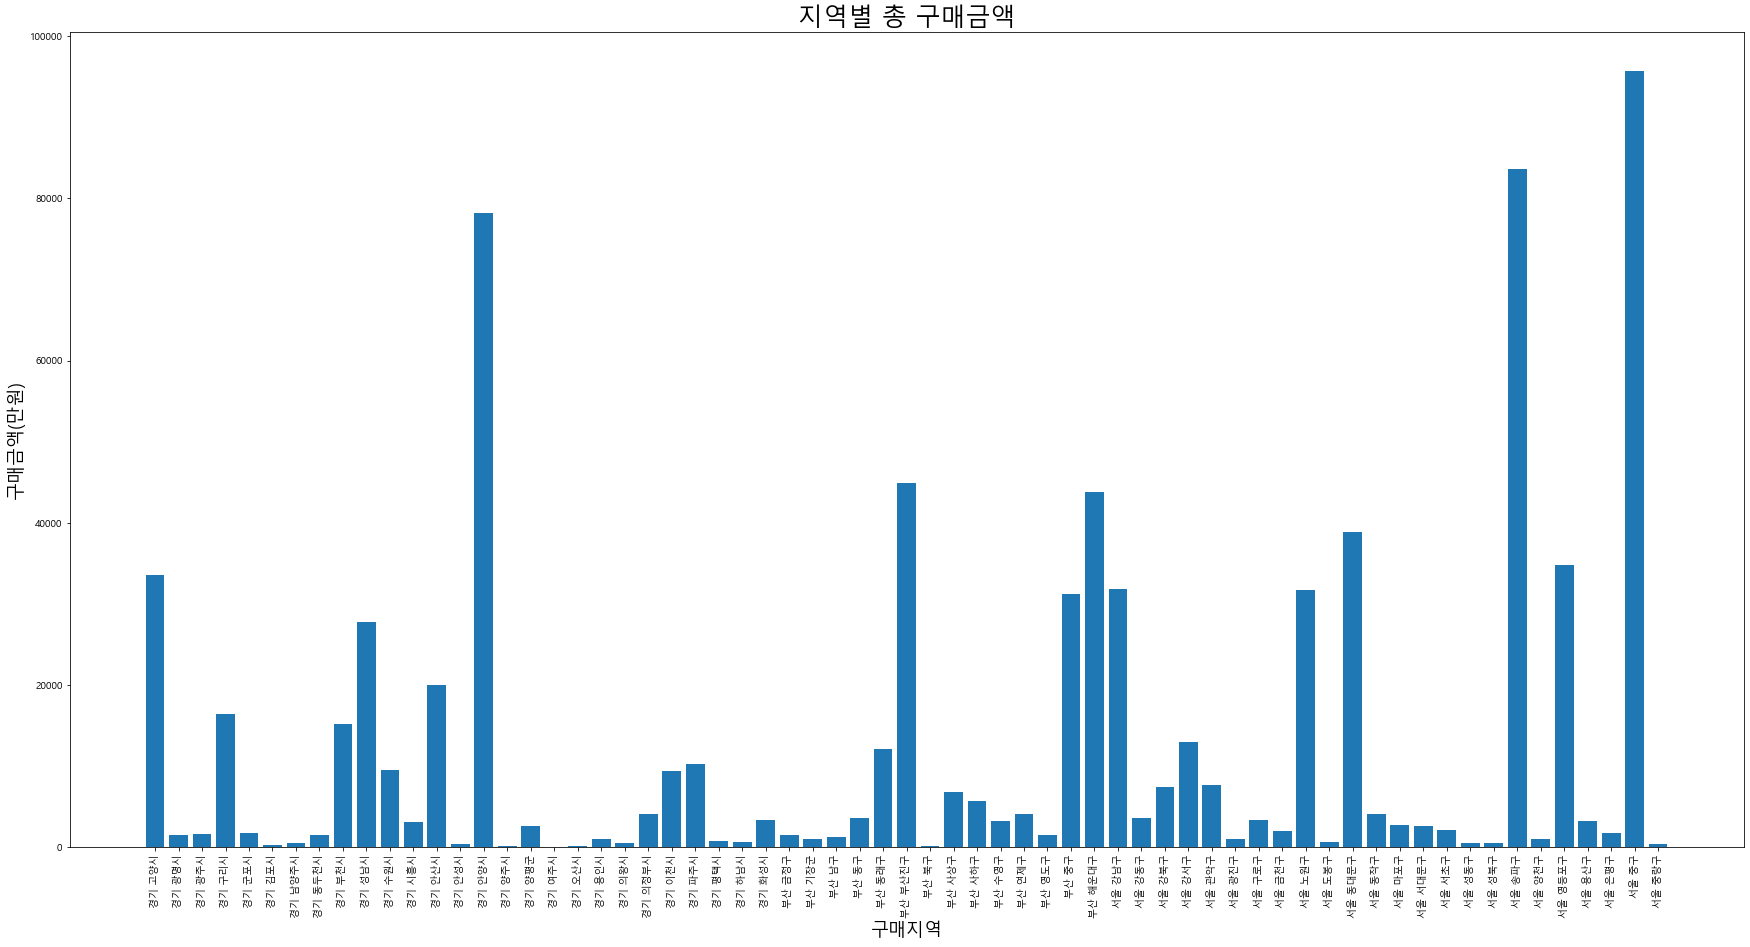

In [32]:
# 모든지역
df_group=pd.DataFrame(df.groupby("구매지역")["구매금액"].sum())
df_group["구매금액"]=df_group["구매금액"]/10000
display(df_group)
bar_graph(df_group,"지역별 총 구매금액","구매지역","구매금액(만원)",30,15)

Index(['경기 고양시', '경기 광명시', '경기 광주시', '경기 구리시', '경기 군포시', '경기 김포시', '경기 남양주시',
       '경기 동두천시', '경기 부천시', '경기 성남시', '경기 수원시', '경기 시흥시', '경기 안산시', '경기 안성시',
       '경기 안양시', '경기 양주시', '경기 양평군', '경기 여주시', '경기 오산시', '경기 용인시', '경기 의왕시',
       '경기 의정부시', '경기 이천시', '경기 파주시', '경기 평택시', '경기 하남시', '경기 화성시', '부산 금정구',
       '부산 기장군', '부산 남구', '부산 동구', '부산 동래구', '부산 부산진구', '부산 북구', '부산 사상구',
       '부산 사하구', '부산 수영구', '부산 연제구', '부산 영도구', '부산 중구', '부산 해운대구', '서울 강남구',
       '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구', '서울 구로구', '서울 금천구',
       '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구', '서울 마포구', '서울 서대문구', '서울 서초구',
       '서울 성동구', '서울 성북구', '서울 송파구', '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구',
       '서울 중구', '서울 중랑구'],
      dtype='object', name='구매지역')

<ipython-input-30-e364875b4544>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


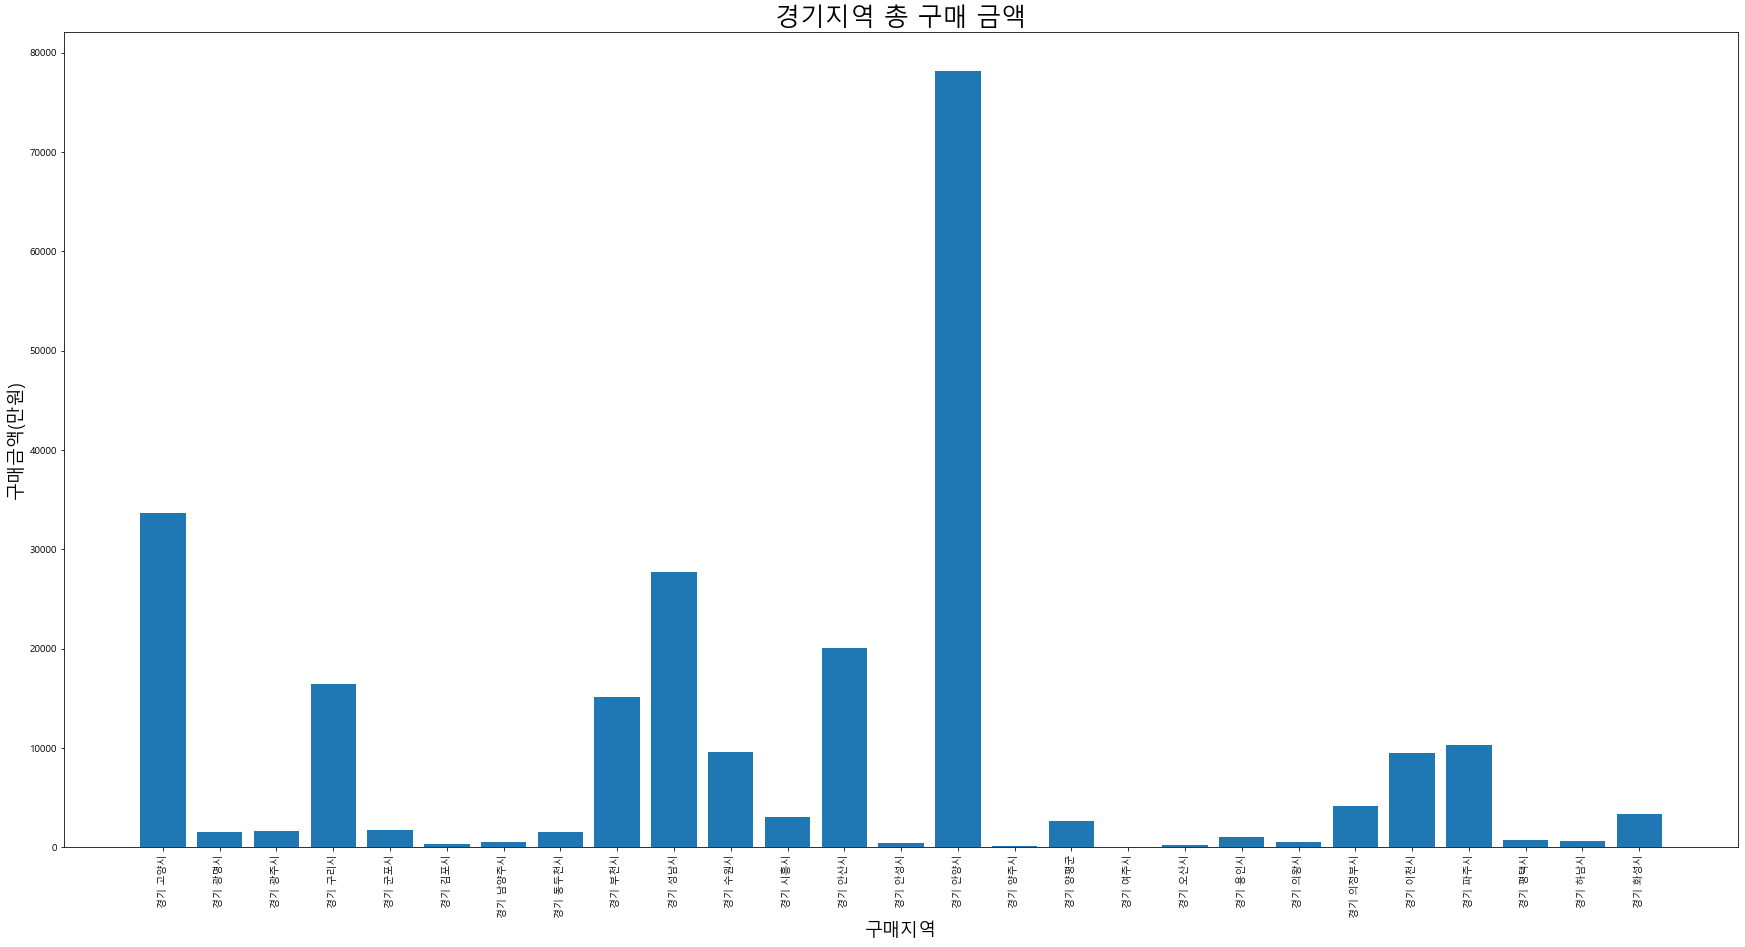

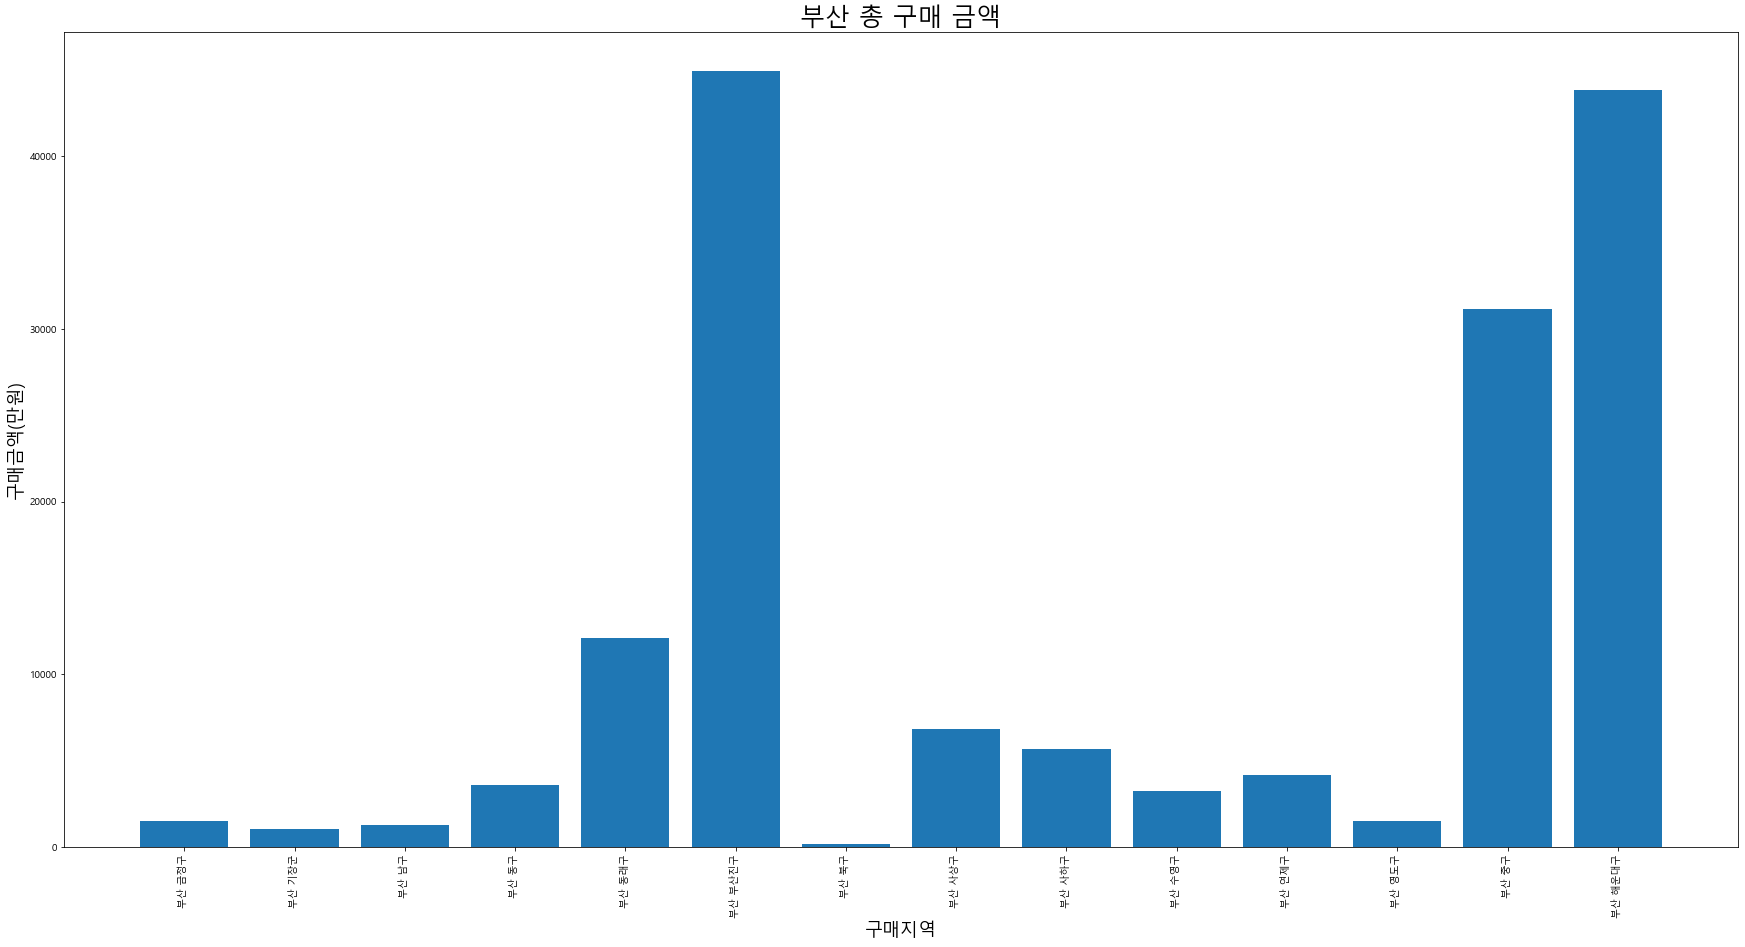

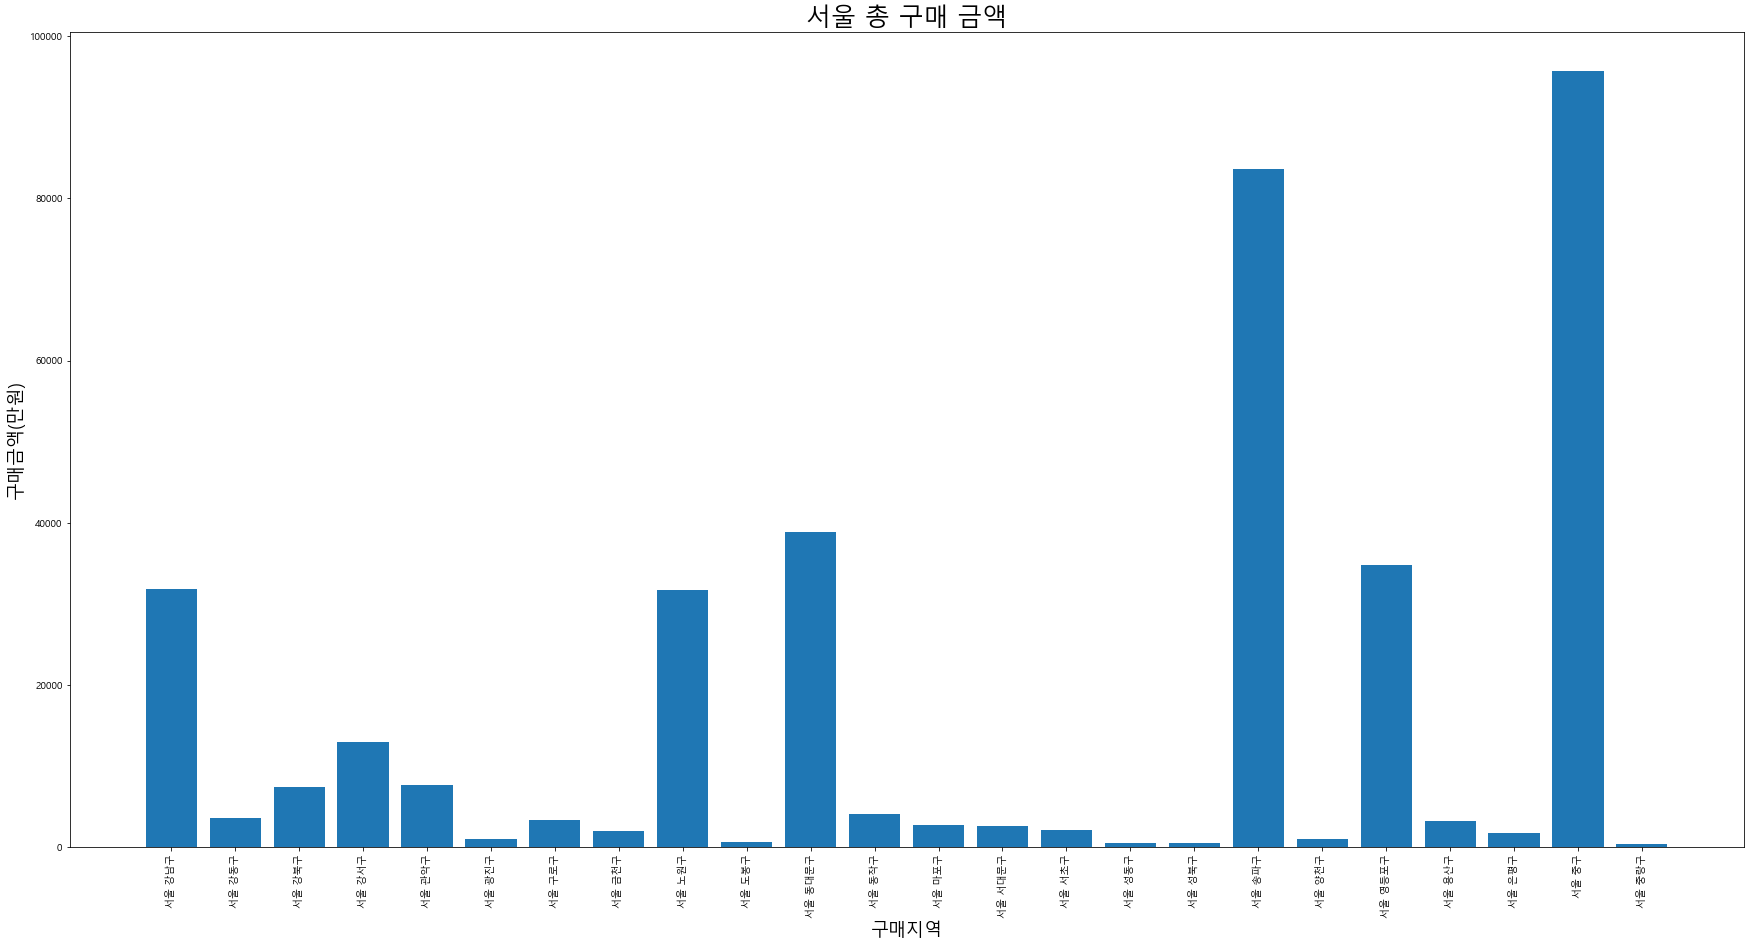

In [33]:
display(df_group.index)

busanI=list(df_group.index).index("부산 금정구")
seoulI=list(df_group.index).index("서울 강남구")

#경기
kyung_df=df_group.iloc[0:busanI]
bar_graph(kyung_df,"경기지역 총 구매 금액","구매지역","구매금액(만원)",30,15)
#부산
busan_df=df_group.iloc[busanI:seoulI]
bar_graph(busan_df,"부산 총 구매 금액","구매지역","구매금액(만원)",30,15)
#서울
seoul_df=df_group.iloc[seoulI:]
bar_graph(seoul_df,"서울 총 구매 금액","구매지역","구매금액(만원)",30,15)

# 지역(경기,부산,서울)별 구매금액 상위 3곳

In [34]:
def get_top3(df): 
    '''구매금액 상위 3곳 리턴'''
    return list(df.sort_values(by=['구매금액'], ascending=False).index[:3])
    
topL=[]
topL.append(get_top3(kyung_df))
topL.append(get_top3(busan_df))
topL.append(get_top3(seoul_df))
topL

[['경기 안양시', '경기 고양시', '경기 성남시'],
 ['부산 부산진구', '부산 해운대구', '부산 중구'],
 ['서울 중구', '서울 송파구', '서울 동대문구']]

<ipython-input-30-e364875b4544>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


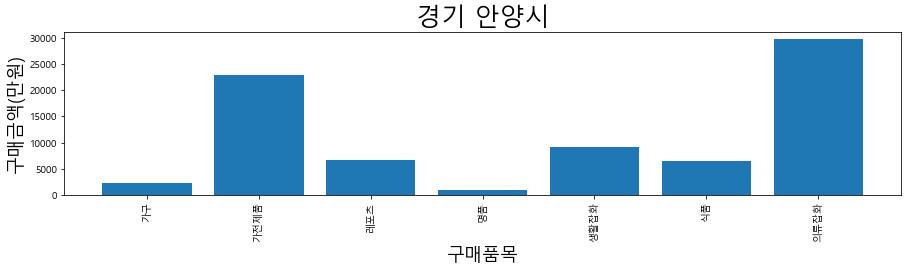

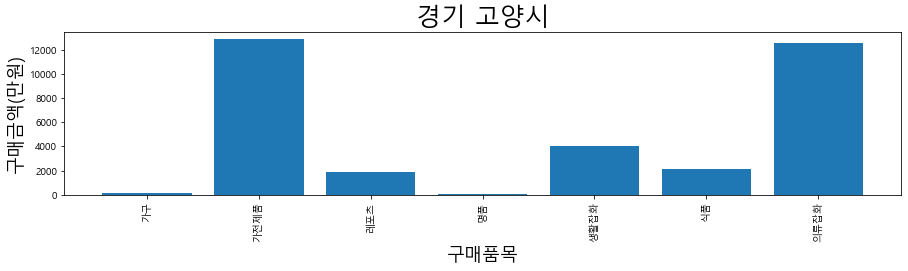

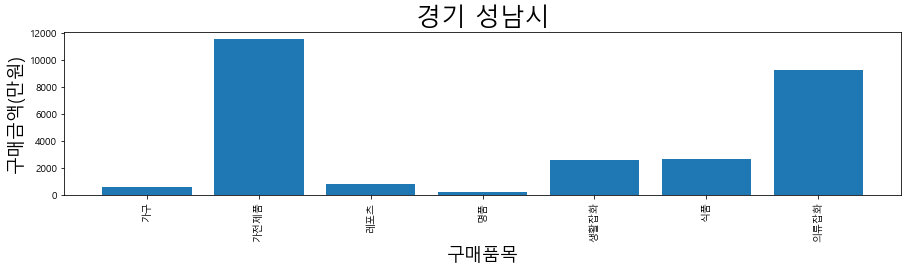

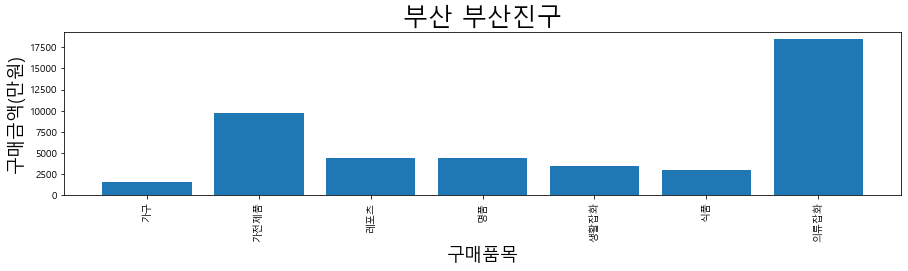

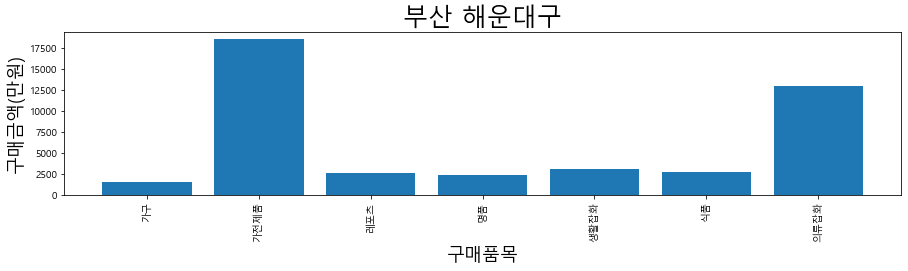

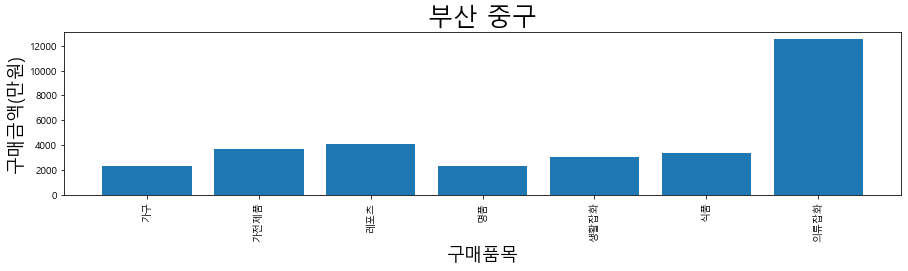

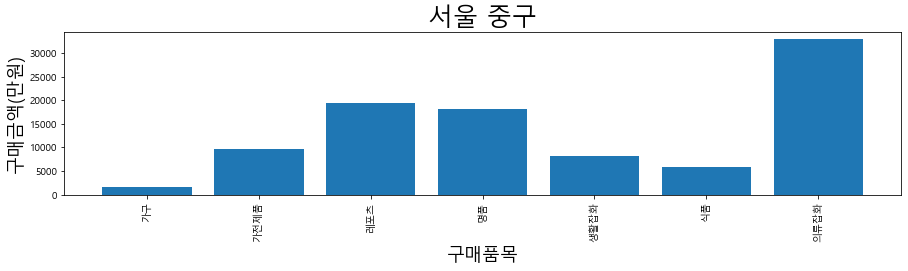

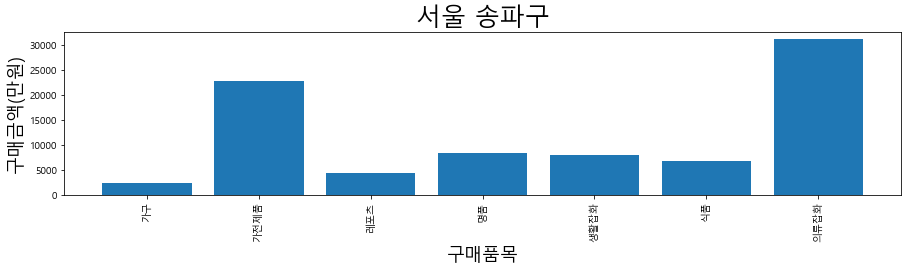

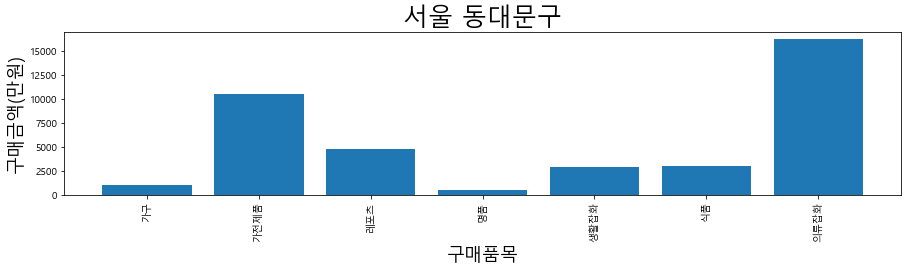

In [35]:
for i in range(3):
    c=topL[i]
    for region in c:
        df_top3_topM=pd.DataFrame(df.query(f"구매지역 == '{region}'").groupby("상품대분류명")["구매금액"].sum())
        df_top3_topM.sort_values(by=['구매금액'],ascending=False)
        
        df_top3_topM["구매금액"]=df_top3_topM["구매금액"]/10000
        
        bar_graph(df_top3_topM,region,"구매품목","구매금액(만원)",15,3)

# 제품별 상위 구매지역 3곳

<ipython-input-30-e364875b4544>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


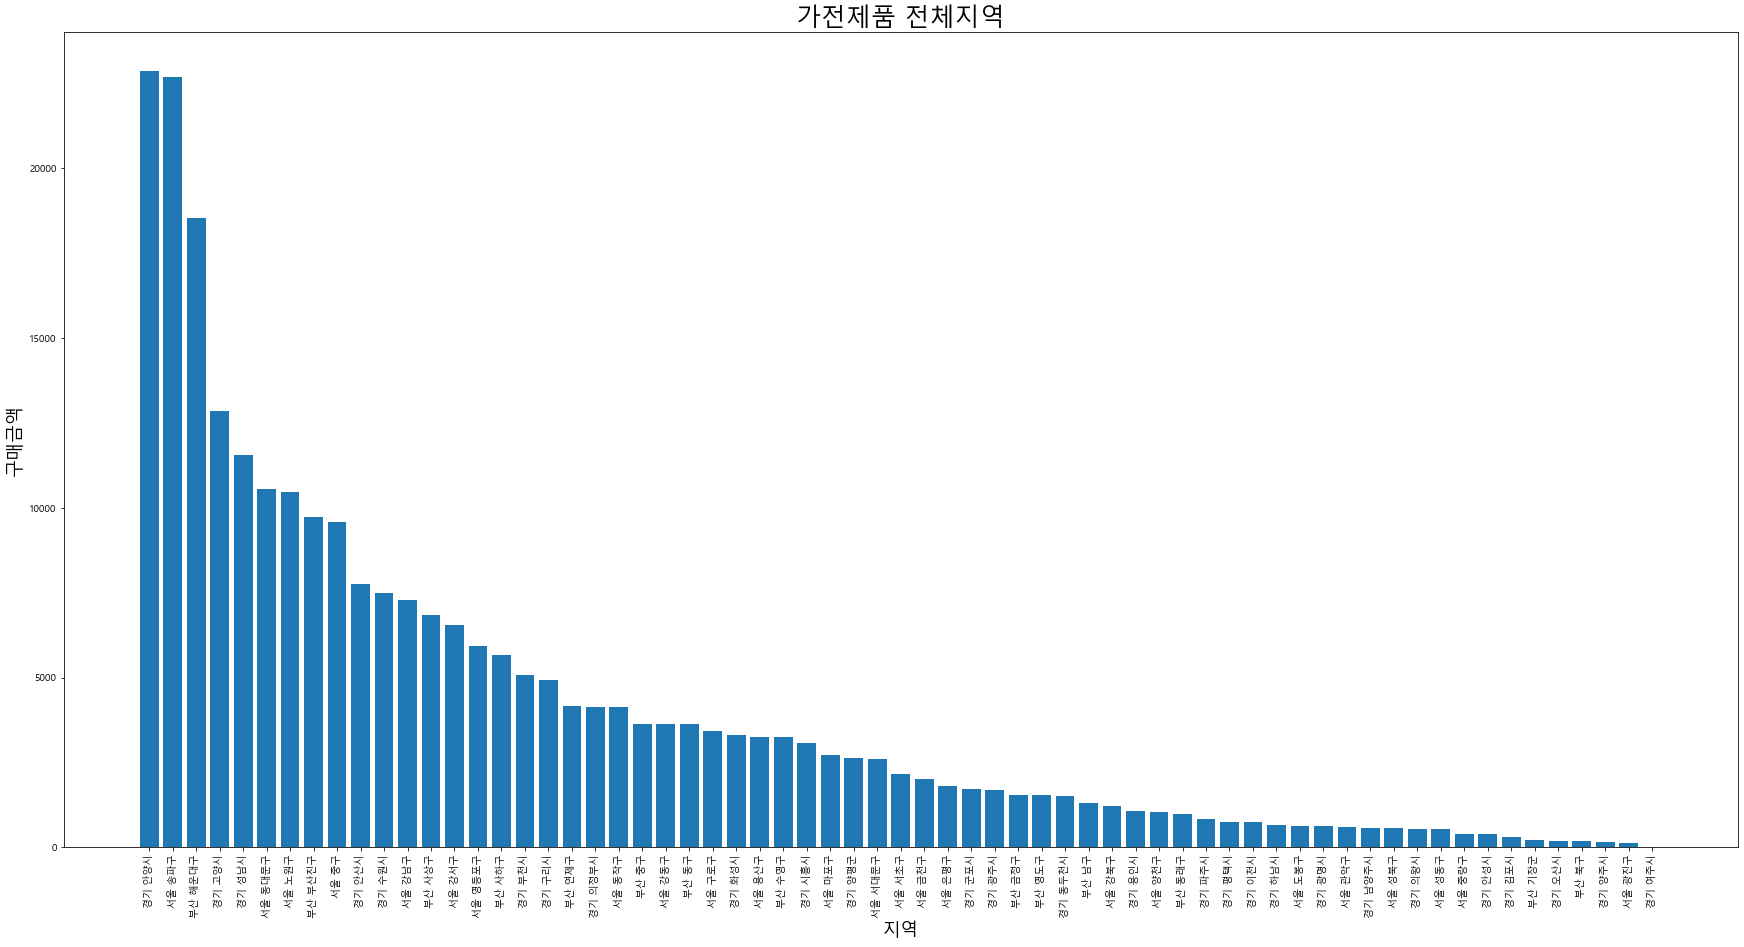

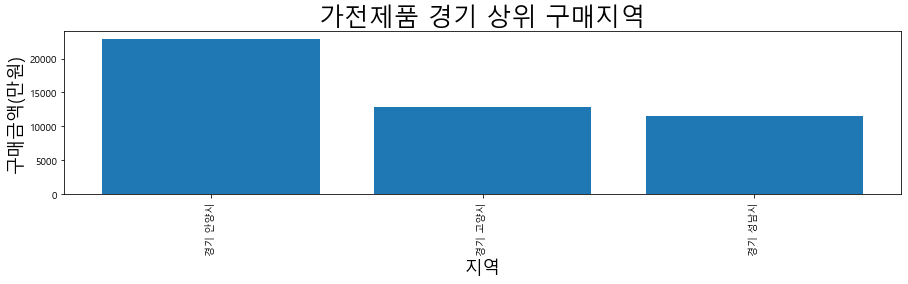

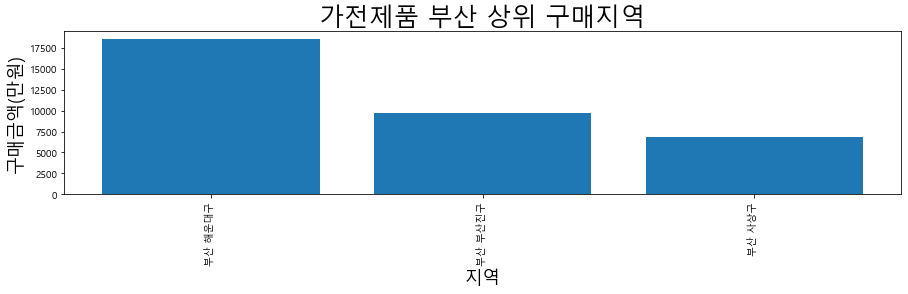

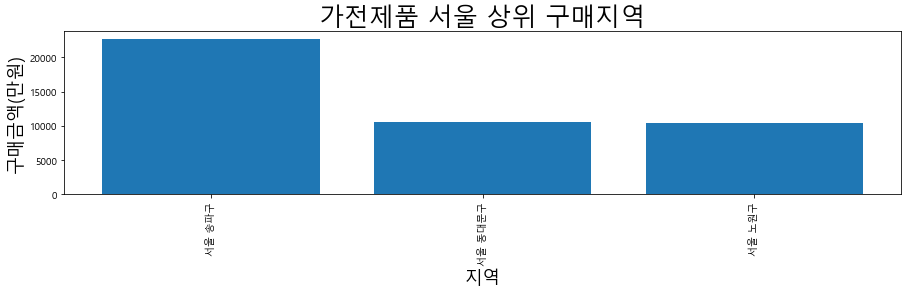

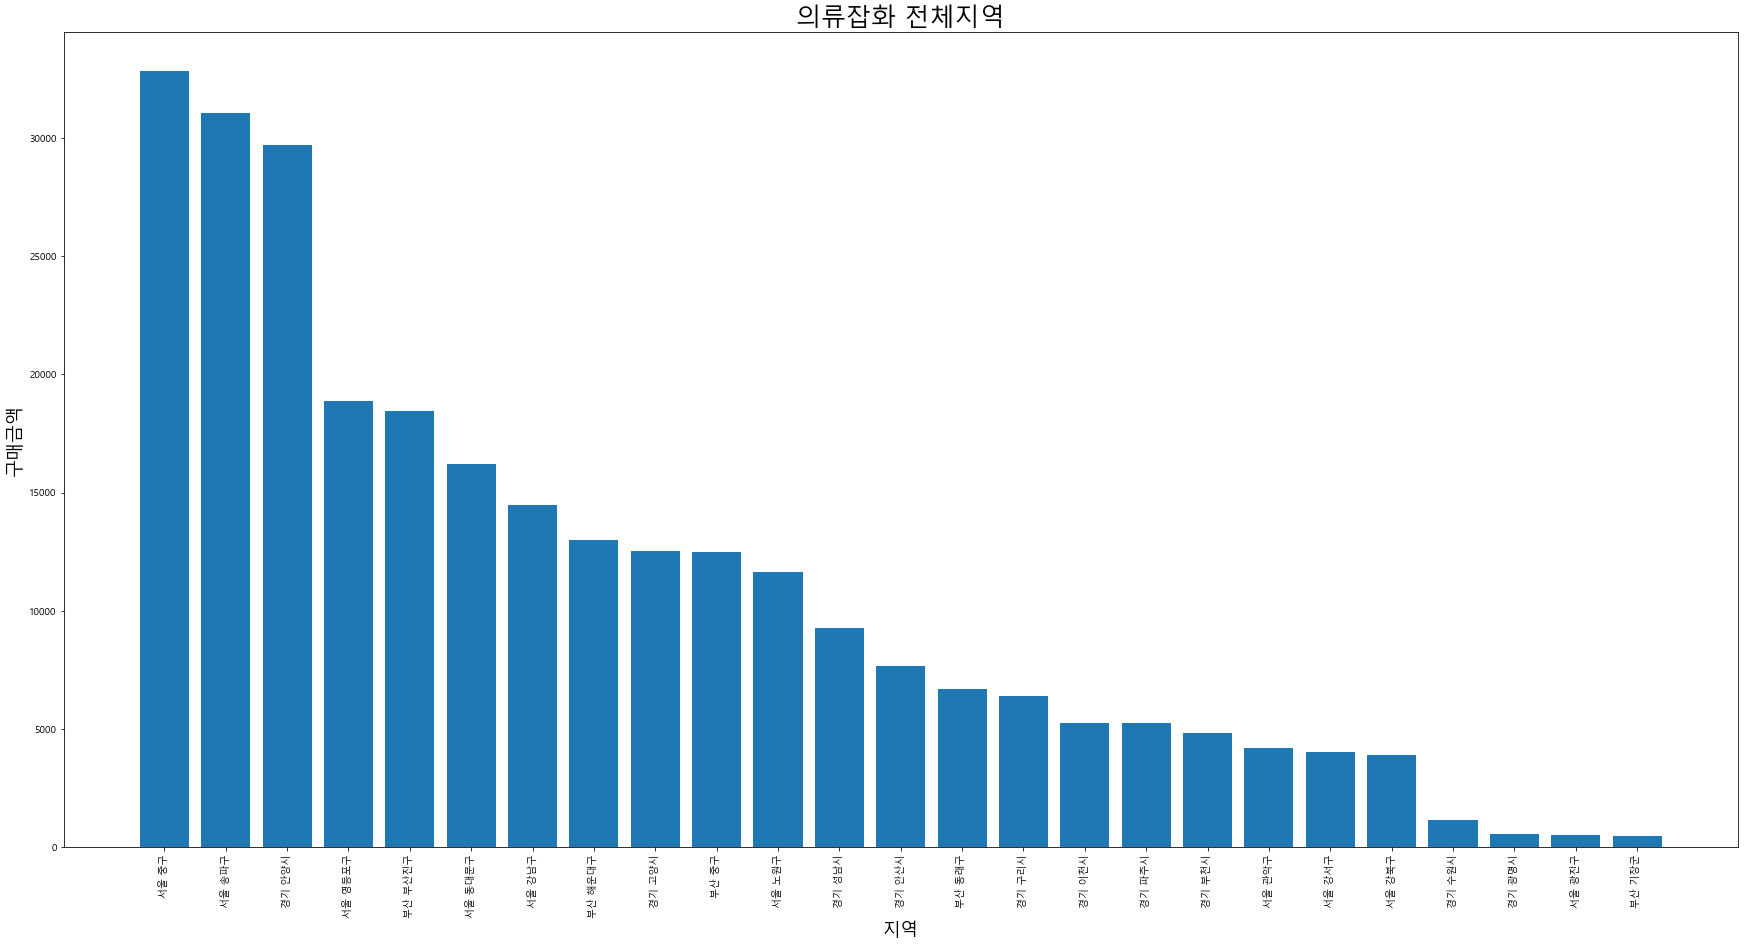

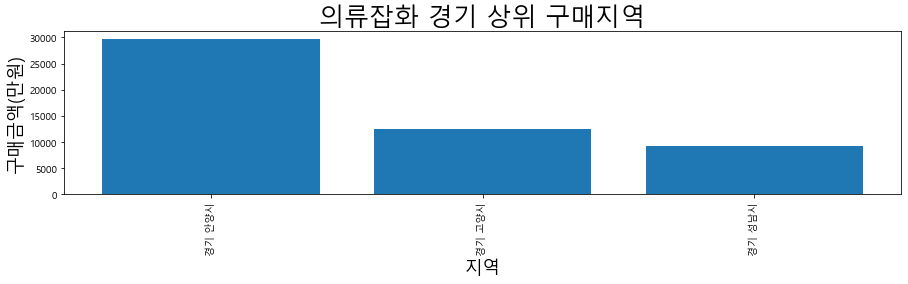

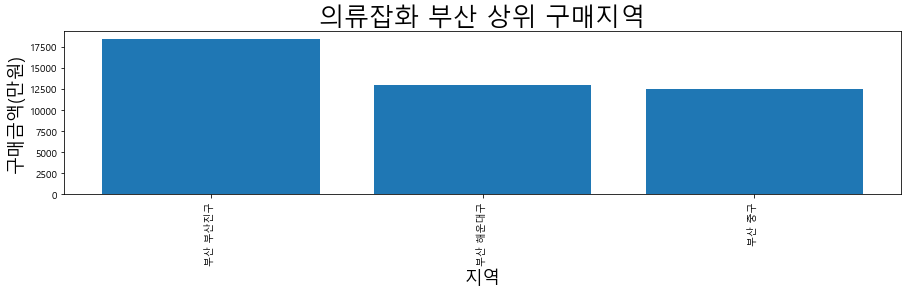

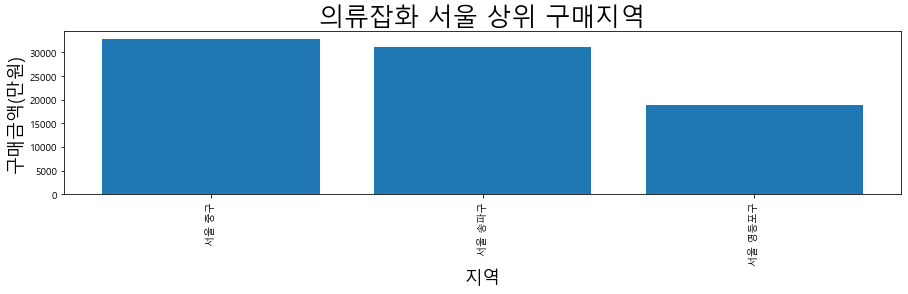

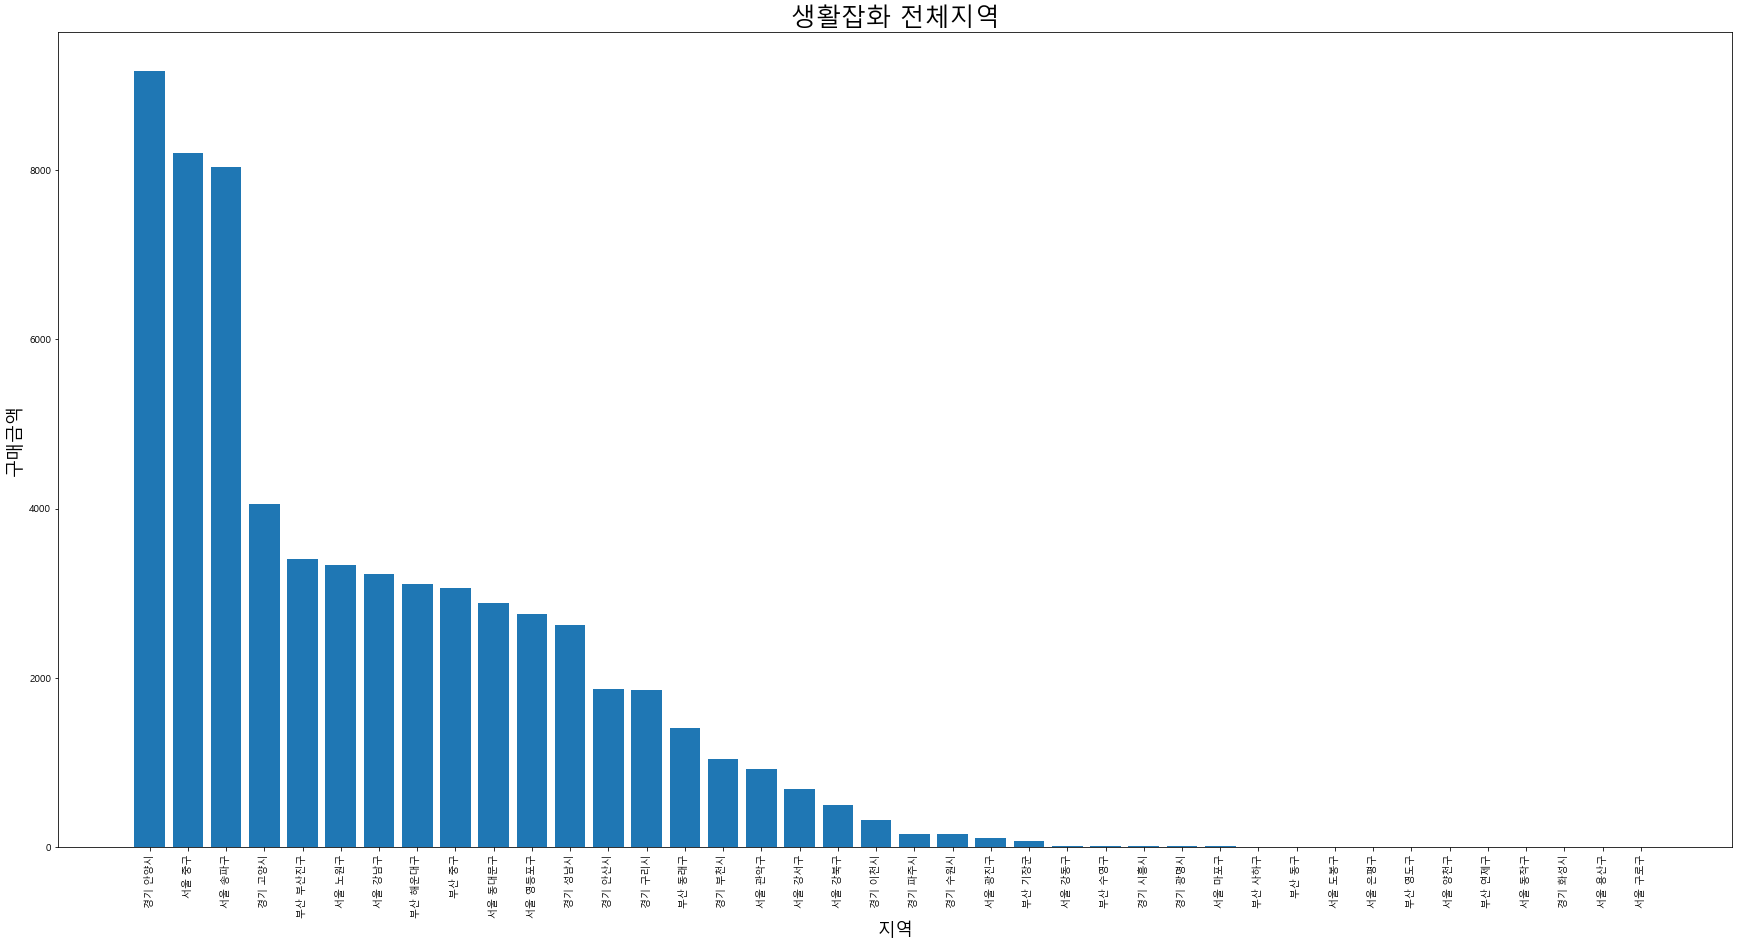

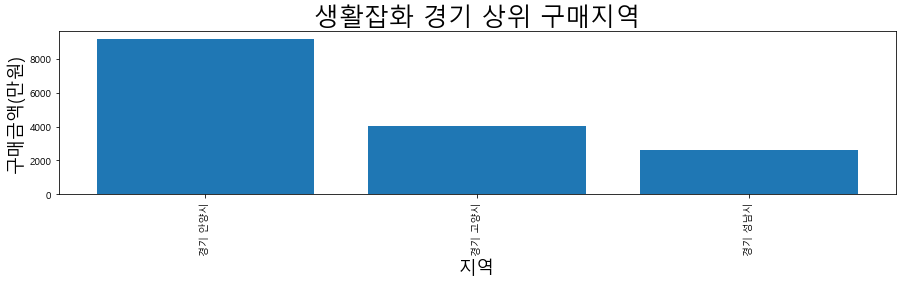

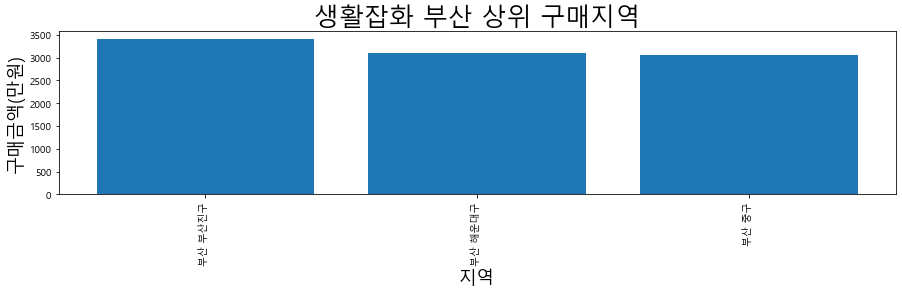

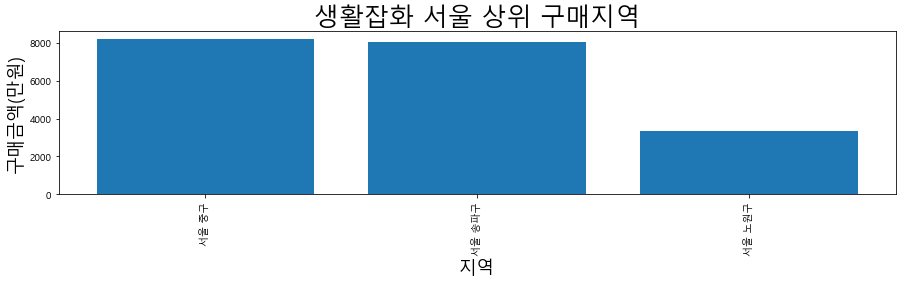

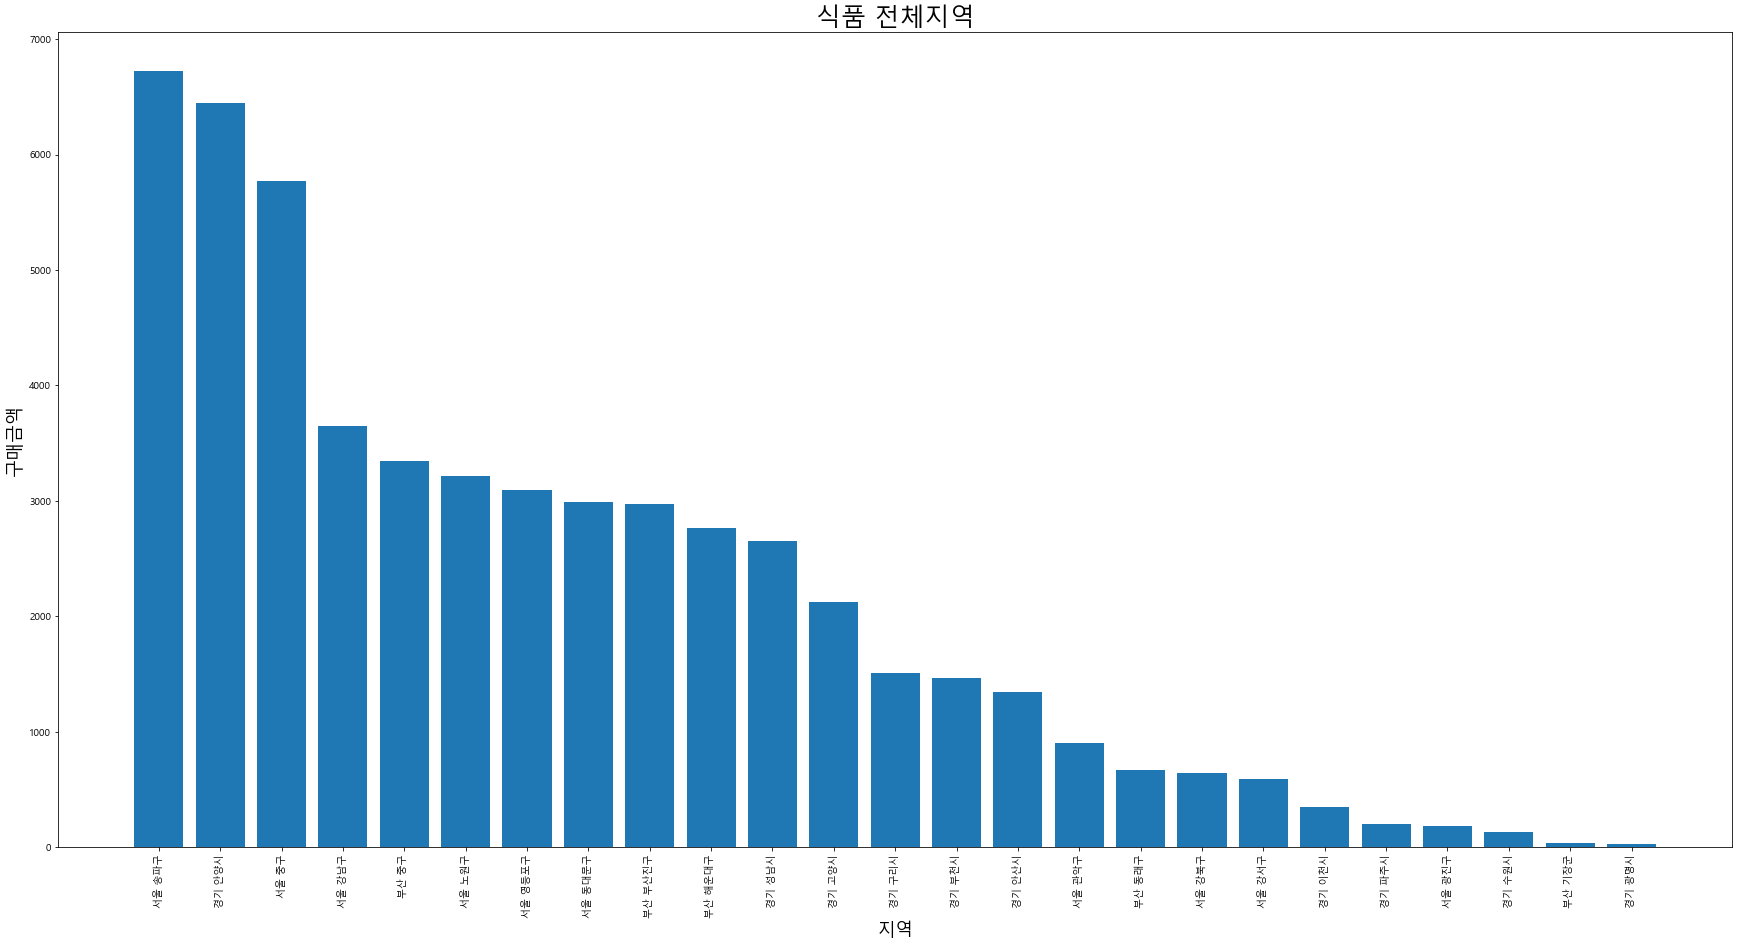

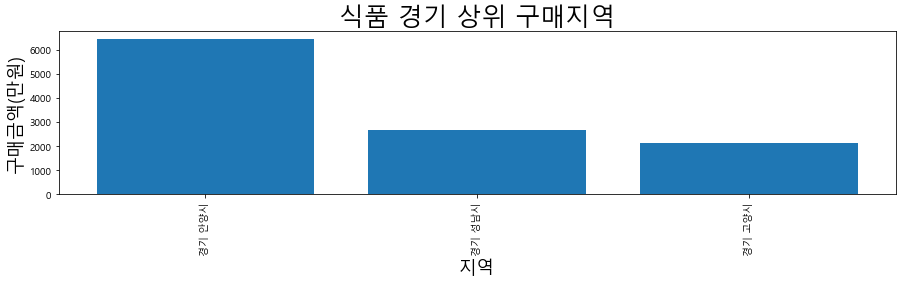

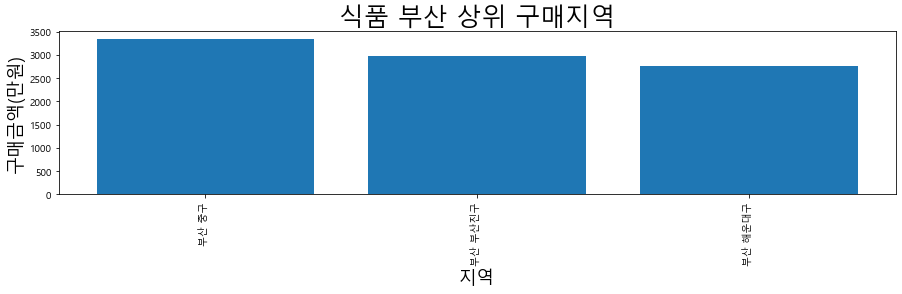

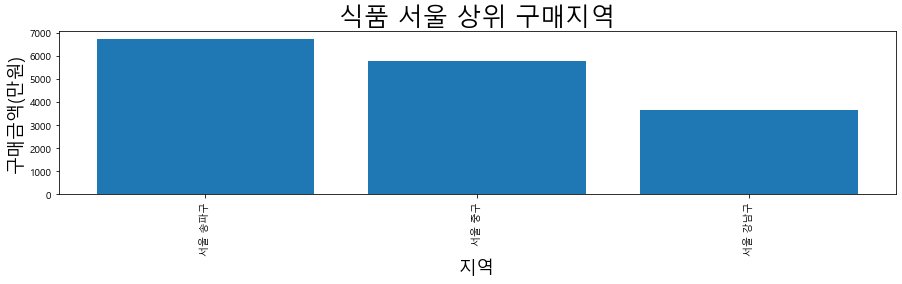

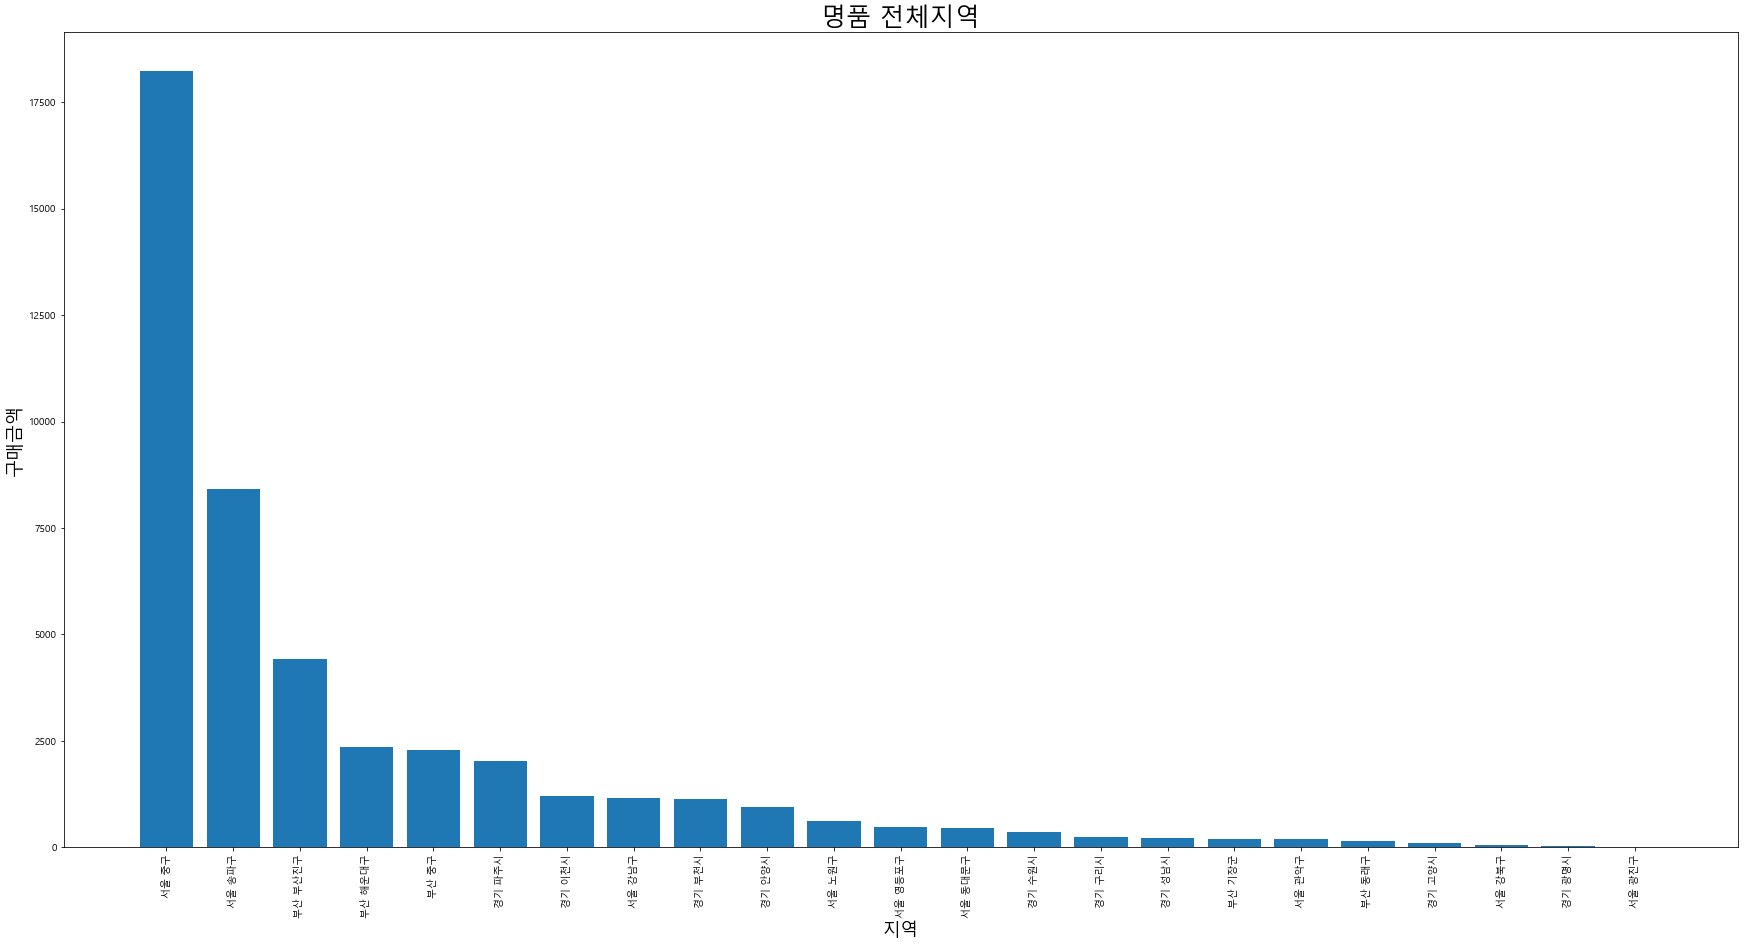

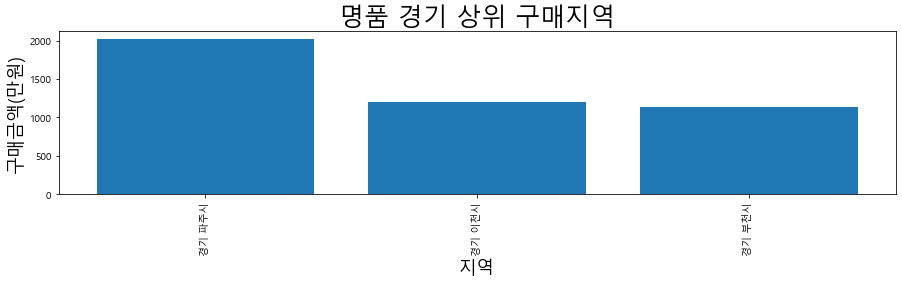

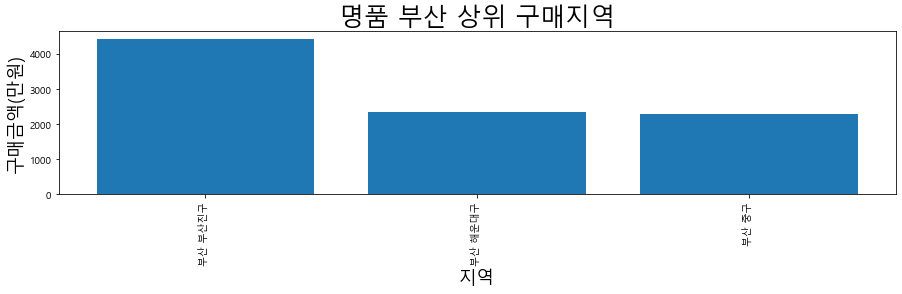

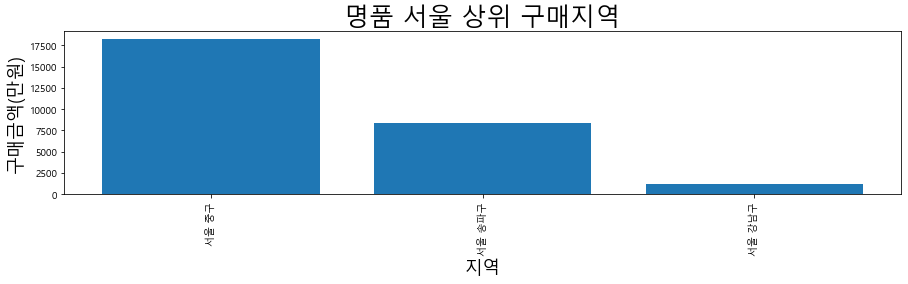

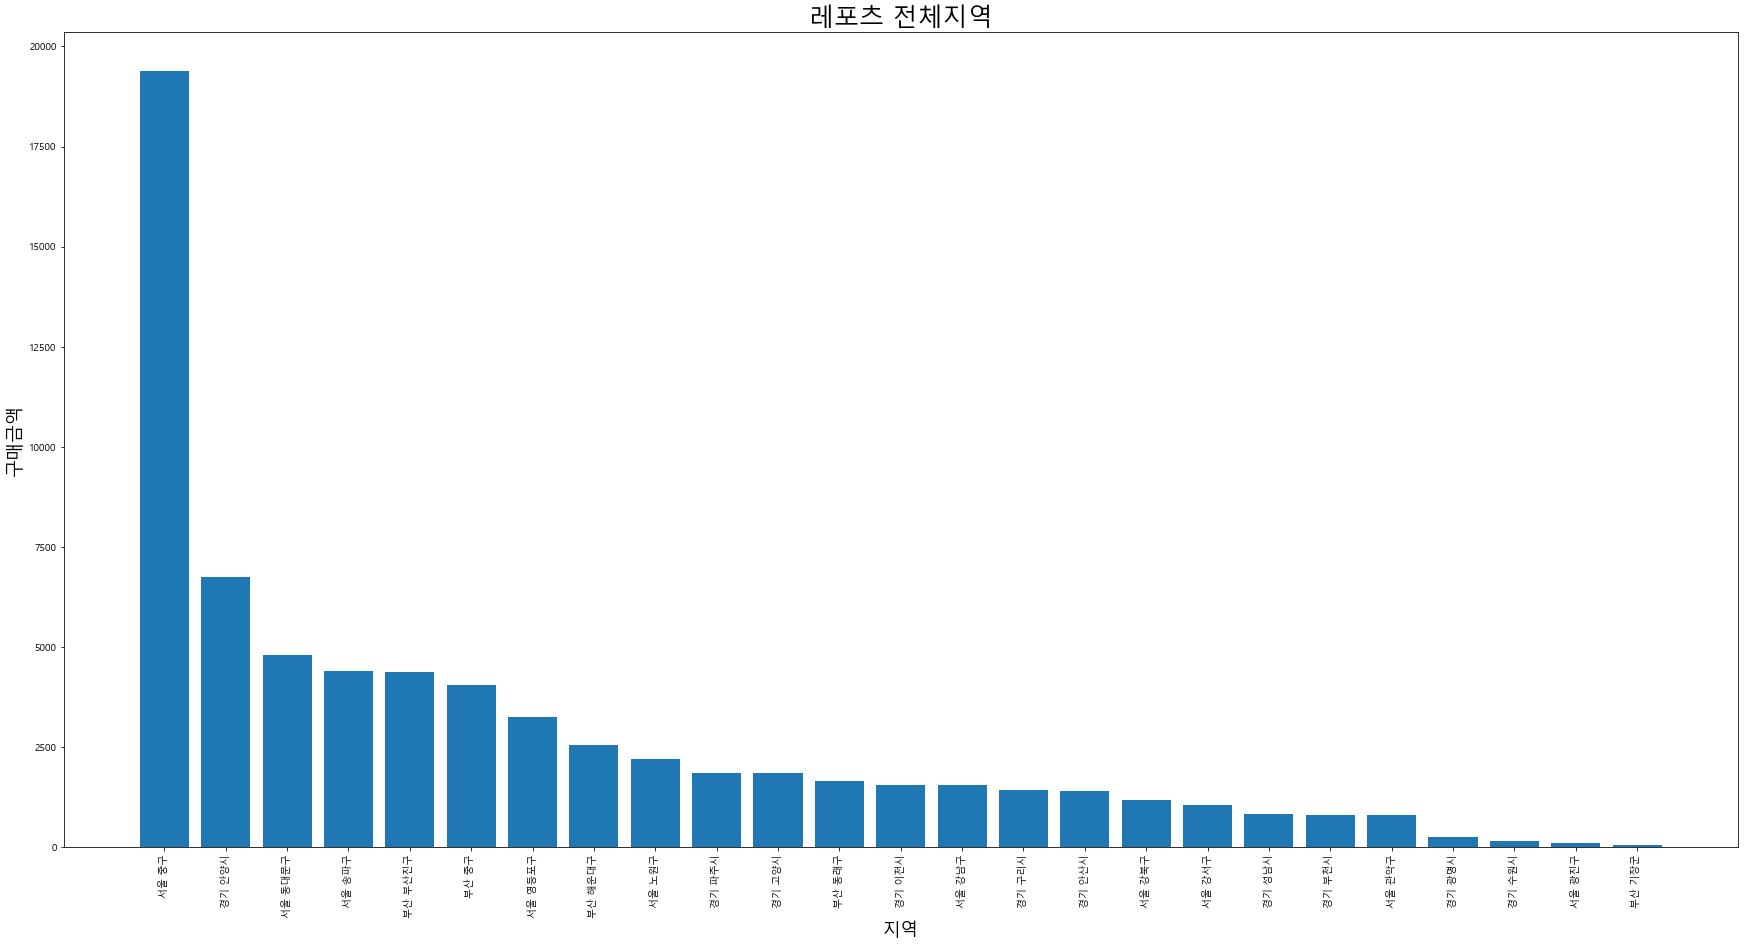

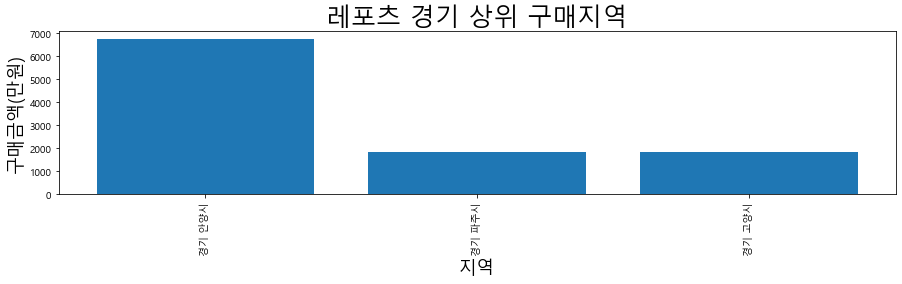

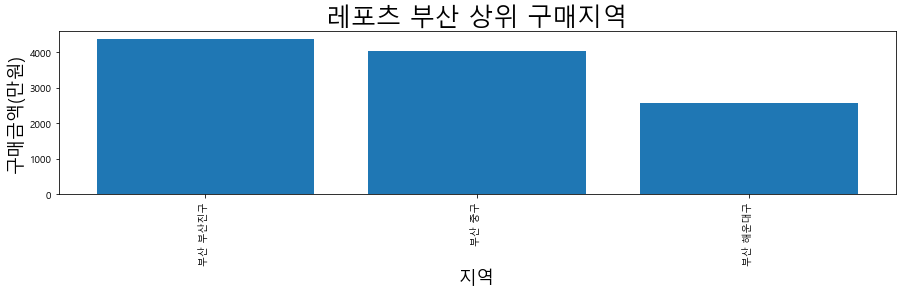

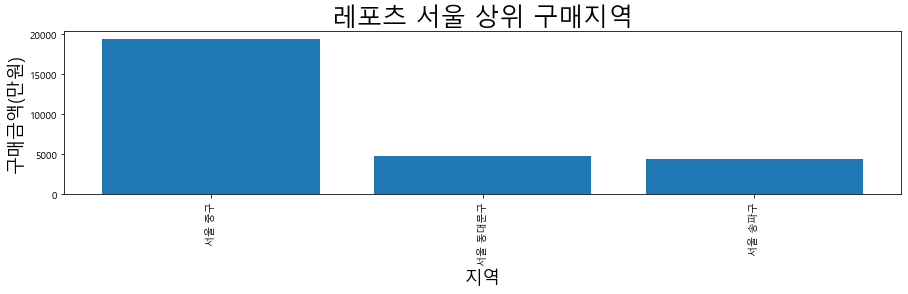

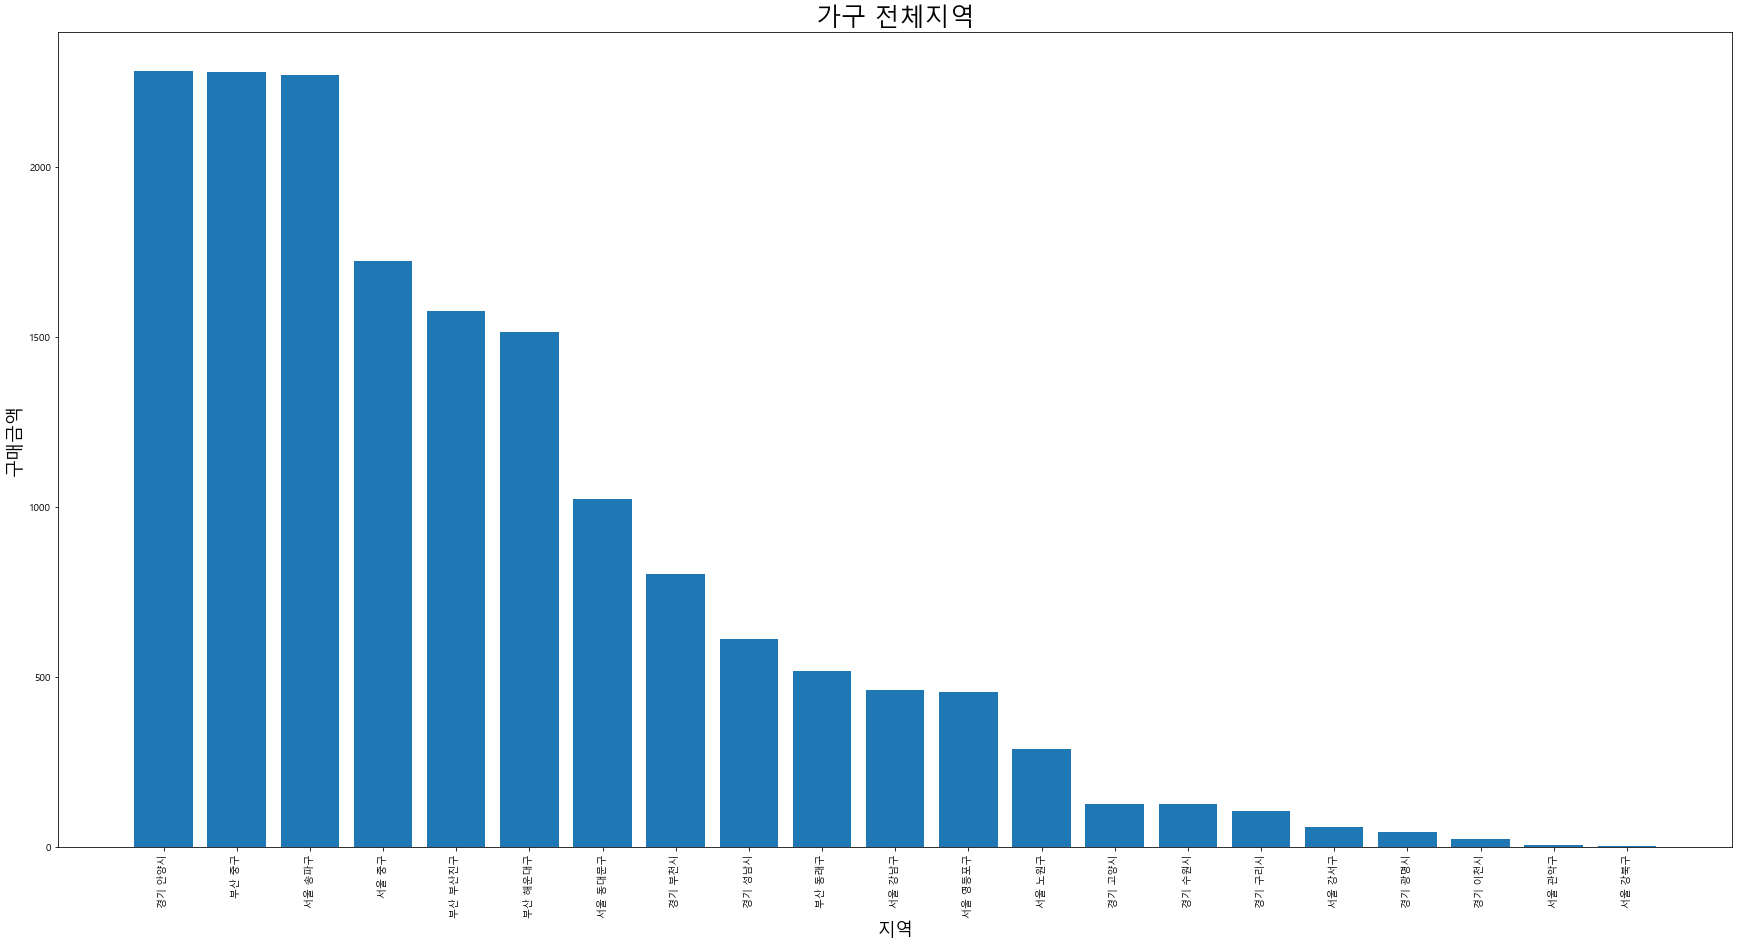

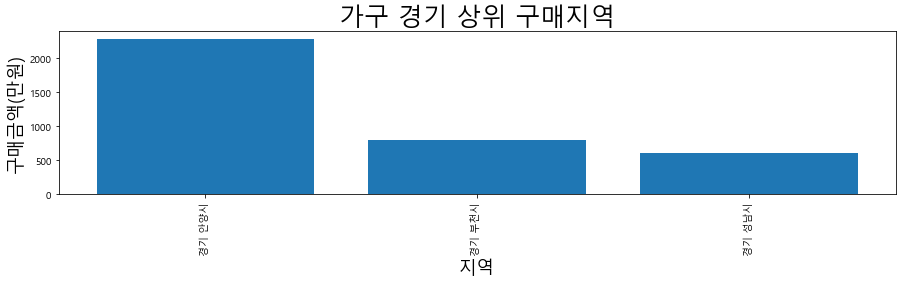

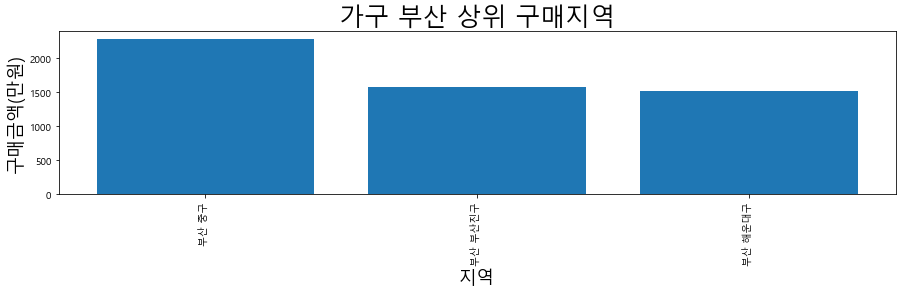

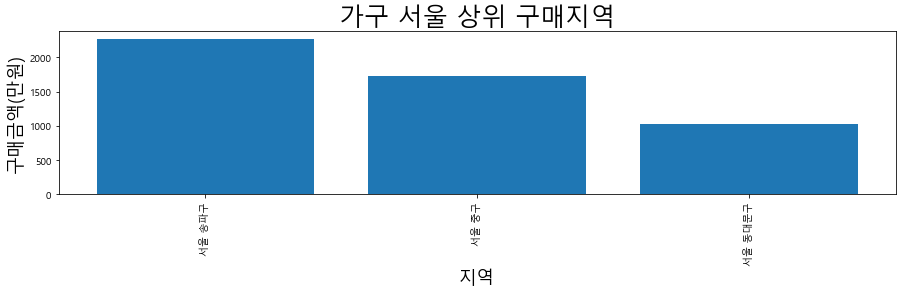

In [36]:
pivot_df=pd.pivot_table(df, index=["상품대분류명","구매지역"], values=["구매금액"],aggfunc=np.sum)
pivot_df["구매금액"]=pivot_df["구매금액"]/10000

for c in category:
    temp_df=pivot_df.loc[c]
    temp_df.reset_index(inplace=True)
    
    total_df=temp_df.sort_values(by=['구매금액'],ascending=False).set_index("구매지역")
    k_df=temp_df[temp_df["구매지역"].str.contains('경기')].sort_values(by=['구매금액'],ascending=False).set_index("구매지역")
    b_df=temp_df[temp_df["구매지역"].str.contains('부산')].sort_values(by=['구매금액'],ascending=False).set_index("구매지역")
    s_df=temp_df[temp_df["구매지역"].str.contains('서울')].sort_values(by=['구매금액'],ascending=False).set_index("구매지역")

    bar_graph(total_df,c+" 전체지역","지역","구매금액",30,15)
    bar_graph(k_df.iloc[:3],c+" 경기 상위 구매지역","지역","구매금액(만원)",15,3)
    bar_graph(b_df.iloc[:3],c+" 부산 상위 구매지역","지역","구매금액(만원)",15,3)
    bar_graph(s_df.iloc[:3],c+" 서울 상위 구매지역","지역","구매금액(만원)",15,3)

In [37]:
pivot_df_live=pd.pivot_table(df, index=["상품대분류명","구매지역","거주지역"], values=["구매금액"],aggfunc=np.sum)
display(pivot_df_live)

pivot_df_sum=pd.pivot_table(df, index=["상품대분류명","구매지역"], values=["구매금액"],aggfunc=np.sum)
display(pivot_df_sum)

구매금액
상품대분류명 구매지역   거주지역            
가구     경기 고양시 경기 고양시    838000
              경기 광주시     17000
              경기 김포시     17000
              경기 안산시    202000
              경기 파주시     53000
...                        ...
의류잡화   서울 중구  서울 용산구  43366000
              서울 은평구  19324000
              서울 종로구  16097000
              서울 중구   40021000
              서울 중랑구    118000

[3114 rows x 1 columns]

구매금액
상품대분류명 구매지역              
가구     경기 고양시     1280000
       경기 광명시      444000
       경기 구리시     1059000
       경기 부천시     8022000
       경기 성남시     6127000
...                   ...
의류잡화   서울 노원구   116595000
       서울 동대문구  162146000
       서울 송파구   310569000
       서울 영등포구  188713000
       서울 중구    328328000

[224 rows x 1 columns]

# 제품별 외부인 구매 비율

In [38]:
d={}
for c in category:
    d[c]=[]
    for indx in pivot_df_live.index:
        if indx[0]==c and indx[1]==indx[2]:
            d[c].append([1-float(pivot_df_live.loc[(c,indx[1],indx[2])])/float(pivot_df_sum.loc[(c,indx[1])]),indx[1]])
#             d[indx[1]]=float(pivot_df_live.loc[(c,indx[1],indx[2])])/float(pivot_df_sum.loc[(c,indx[1])])
            # 거주자 구매 금액 / 해당지역 구매 총 금액
        

가전제품


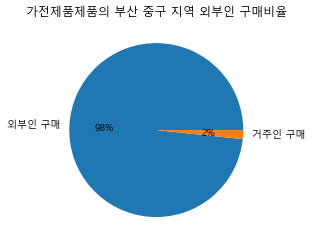

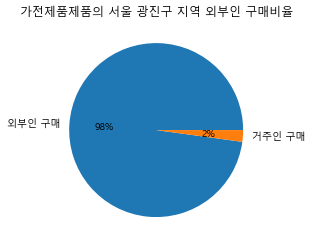

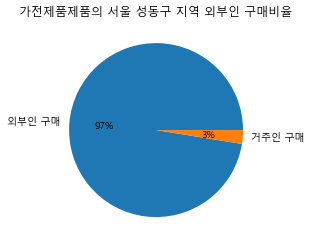

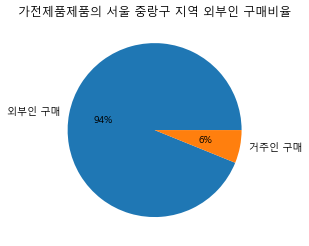

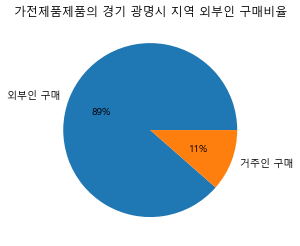

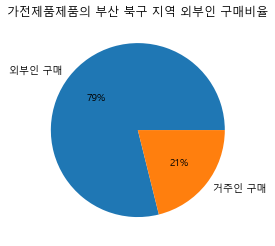

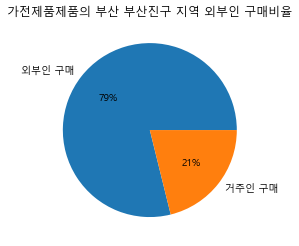

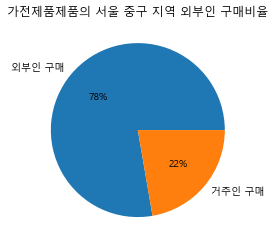

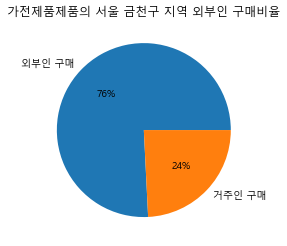

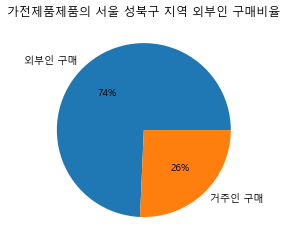

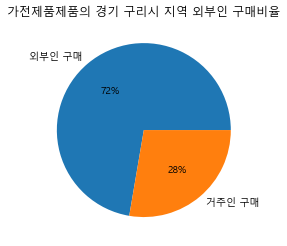

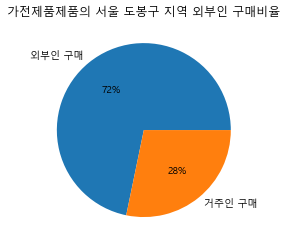

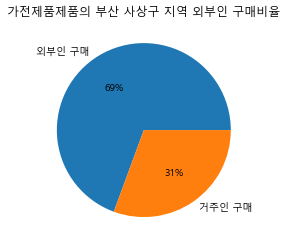

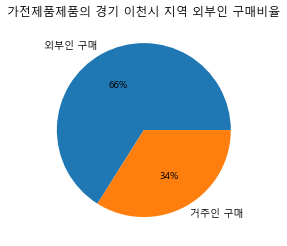

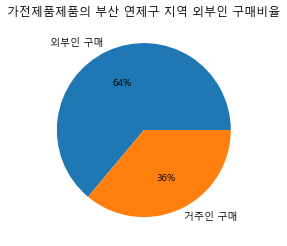

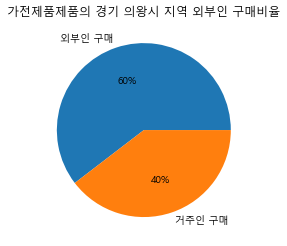

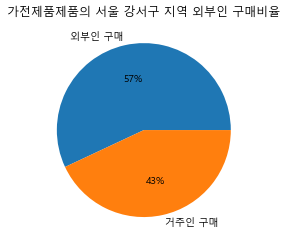

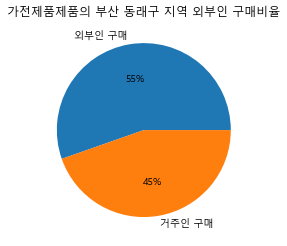

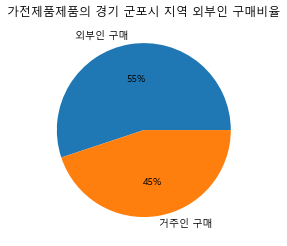

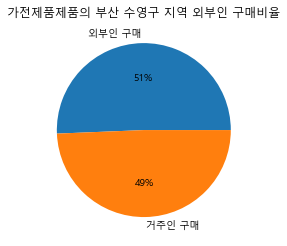

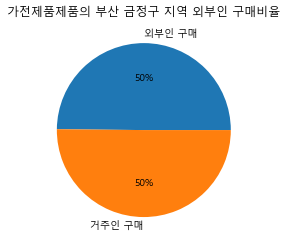

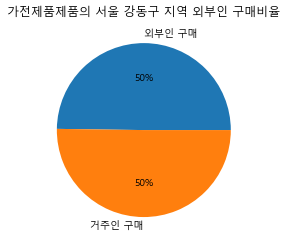

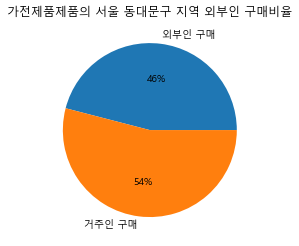

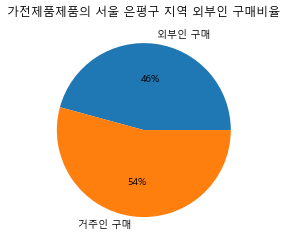

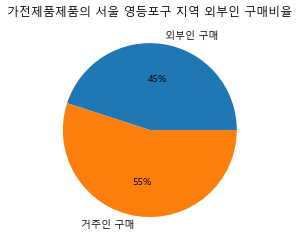

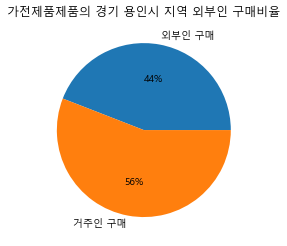

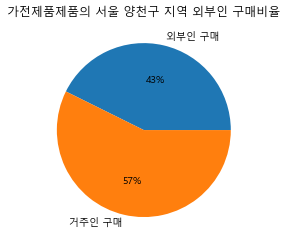

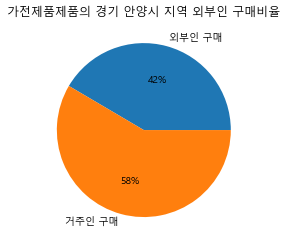

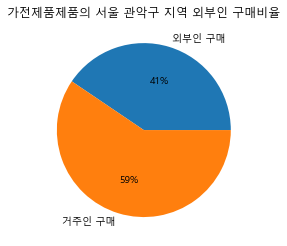

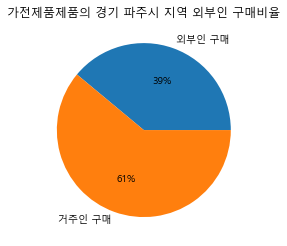

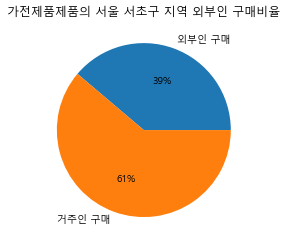

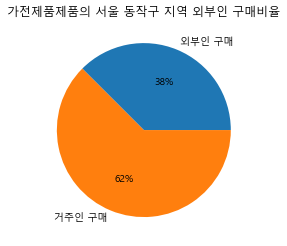

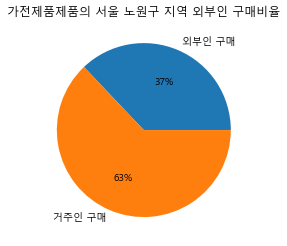

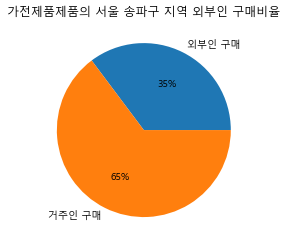

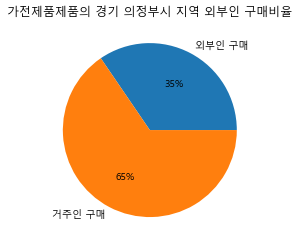

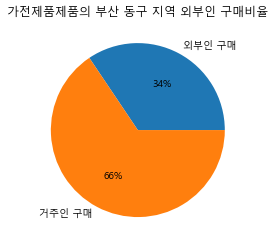

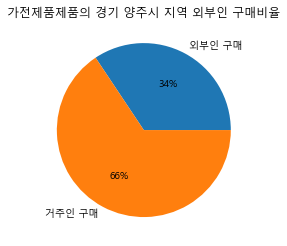

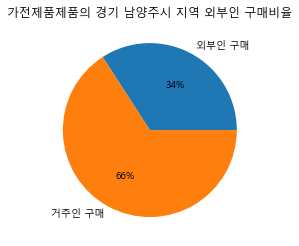

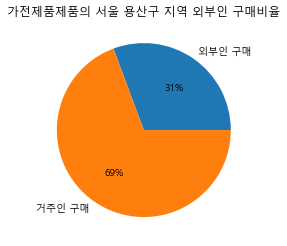

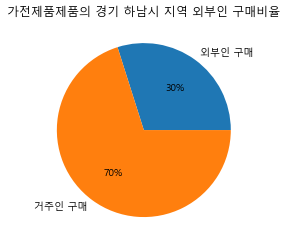

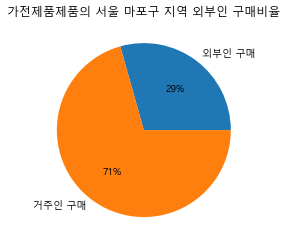

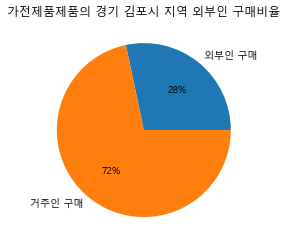

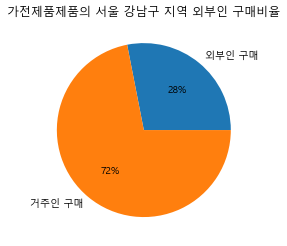

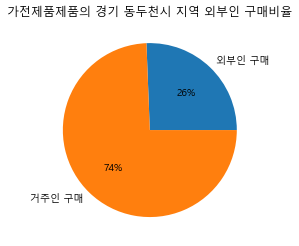

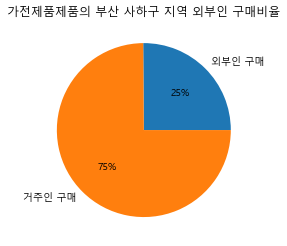

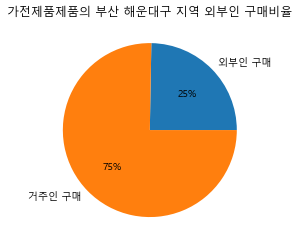

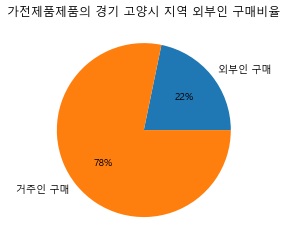

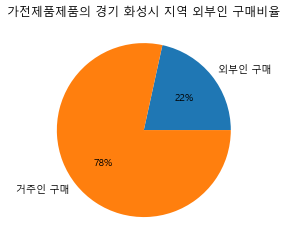

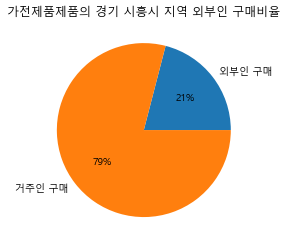

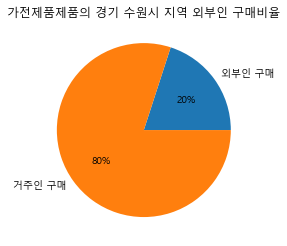

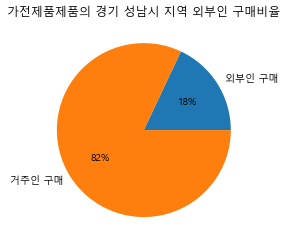

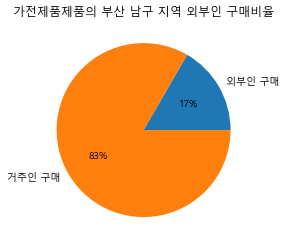

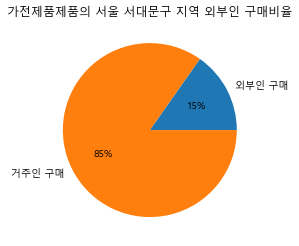

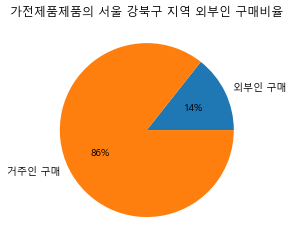

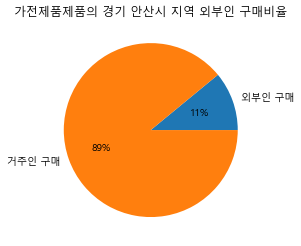

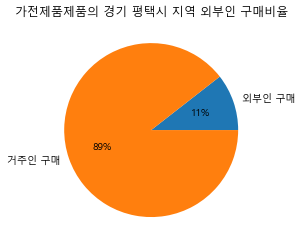

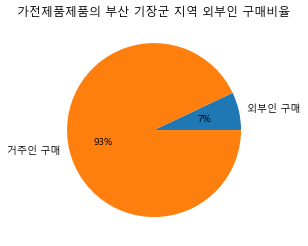

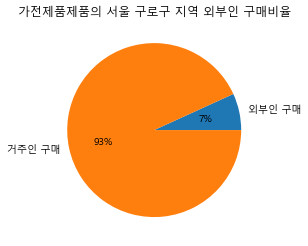

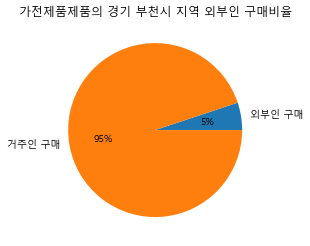

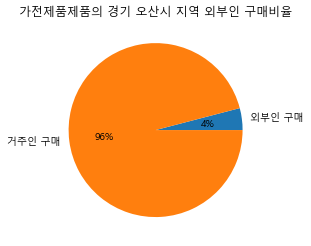

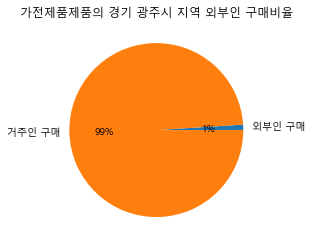

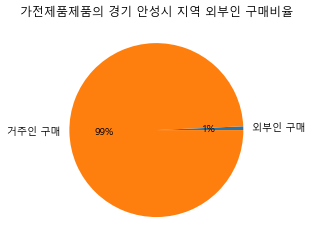

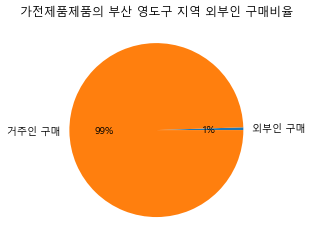

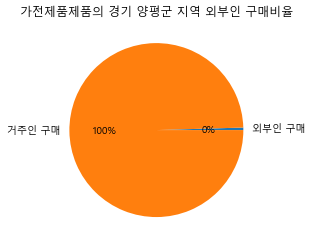

IndexError: list index out of range

In [39]:
showNum=100
for c in d:
    print(c)
    L=sorted(d[c],reverse=True)
    for i in range(showNum):
        values=[L[i][0],1-L[i][0]]
        labels=["외부인 구매","거주인 구매"]
    
        to_pie(values,labels,f"{c}제품의 {L[i][1]} 지역 외부인 구매비율")

# 제품별 성별에 다른 구매금액

In [40]:
pivot_df_gender=pd.pivot_table(df, index=["상품중분류명"],columns=["성별"], values=["구매금액"],aggfunc=[np.sum])

display(pivot_df_gender)

ratio={"비율(남성구매비율)":[]}
for c in pivot_df_gender.index:
    t=pivot_df_gender.loc[c][('sum', '구매금액', 1)]+pivot_df_gender.loc[c][('sum', '구매금액', 2)]
    ratio["비율(남성구매비율)"].append(pivot_df_gender.loc[c][('sum', '구매금액', 1)]/t)
    

ratio_df=pd.DataFrame(ratio)
concated_ratio_df=pd.concat((pivot_df_gender.reset_index()[[('상품중분류명',     '', '')]],ratio_df),axis=1).set_index(('상품중분류명',     '', ''))
pivot_df_gender=pd.concat((pivot_df_gender,concated_ratio_df),axis=1)
pivot_df_gender.columns=["남자","여자","남자 구매 비율"]
display(pivot_df_gender)

sum           
                     구매금액           
성별                      1          2
상품중분류명                              
PC/노트북/프린터/카메라   58574000  107693000
TV/AV           160675000  520974000
가공식품             47040000  171339000
가구               29435000  133714000
건강식품             14145000   65913000
...                   ...        ...
침구류              23392000  107776000
컴퓨터주변기기           9507000   24288000
패션잡화             17064000   88632000
화장품              64576000  350674000
휴대폰/태블릿          19754000   46630000

[31 rows x 2 columns]

,남자,여자,남자 구매 비율
PC/노트북/프린터/카메라,58574000,107693000,0.352289
TV/AV,160675000,520974000,0.235715
가공식품,47040000,171339000,0.215405
가구,29435000,133714000,0.180418
건강식품,14145000,65913000,0.176684
...,...,...,...
침구류,23392000,107776000,0.178336
컴퓨터주변기기,9507000,24288000,0.281314
패션잡화,17064000,88632000,0.161444
화장품,64576000,350674000,0.155511


<ipython-input-30-e364875b4544>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


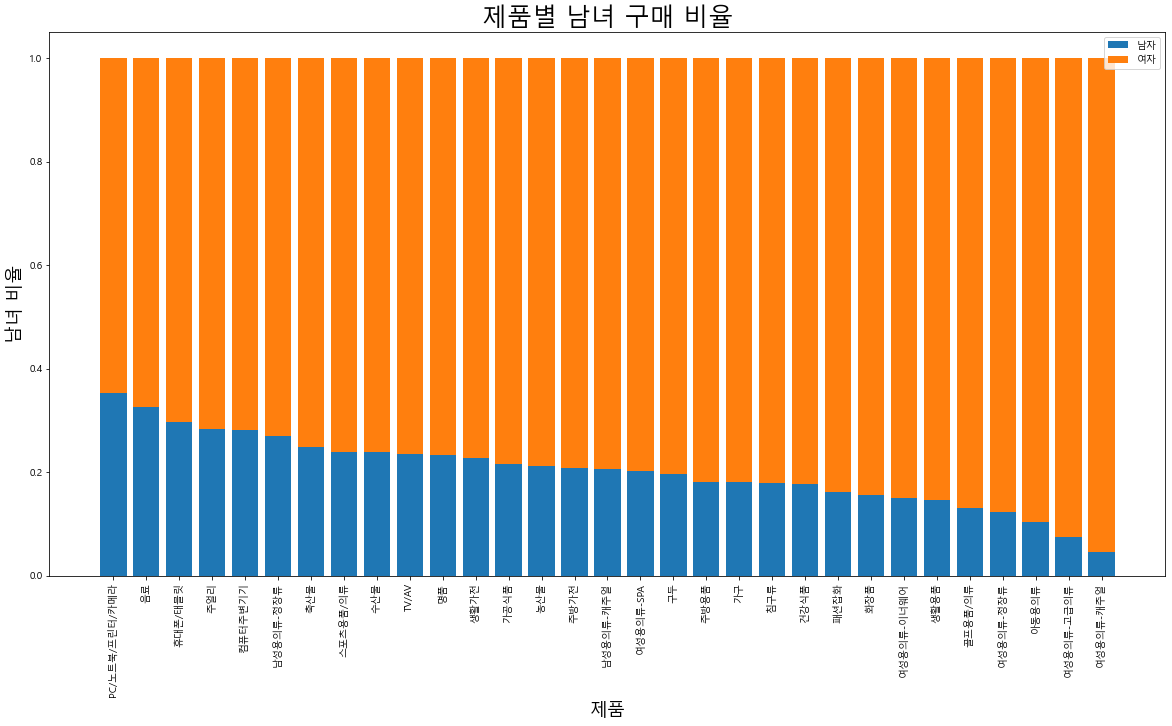

In [41]:
# 제품별 남성 구매 비율(누적 막대그래프)
pivot_df_gender.sort_values("남자 구매 비율",ascending=False,inplace=True)

cumulate_bar(pivot_df_gender[["남자 구매 비율"]])

# 시간대별 구매금액

In [42]:

# 6~14 : 오전, 14~18 : 오후 , 18~22 : 밤, 22~6 : 새벽

size=len(df)
time_class={"구매시간(범주)":[]}

for i in range(size):
    if 6<=df["구매시간"][i]<14:
        time_class["구매시간(범주)"].append("오전")
    elif 14<=df["구매시간"][i]<18:
        time_class["구매시간(범주)"].append("오후")
    elif 18<=df["구매시간"][i]<22:
        time_class["구매시간(범주)"].append("밤")
    else:
        time_class["구매시간(범주)"].append("새벽")
        
time_class_df=pd.DataFrame(time_class)
time_df=pd.concat((df[["상품중분류명","구매금액"]],time_class_df),axis=1)
pivot_time_df=pd.pivot_table(time_df, index=["구매시간(범주)","상품중분류명"], values=["구매금액"],aggfunc=[np.sum])
display(pivot_time_df)

sum
                              구매금액
구매시간(범주) 상품중분류명                   
밤        PC/노트북/프린터/카메라   47146000
         TV/AV           209389000
         가공식품             55974000
         가구               26227000
         건강식품             10965000
...                            ...
오후       침구류              78604000
         컴퓨터주변기기          16165000
         패션잡화             57822000
         화장품             221745000
         휴대폰/태블릿          30173000

[105 rows x 1 columns]

<ipython-input-43-98f21a29b7f3>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


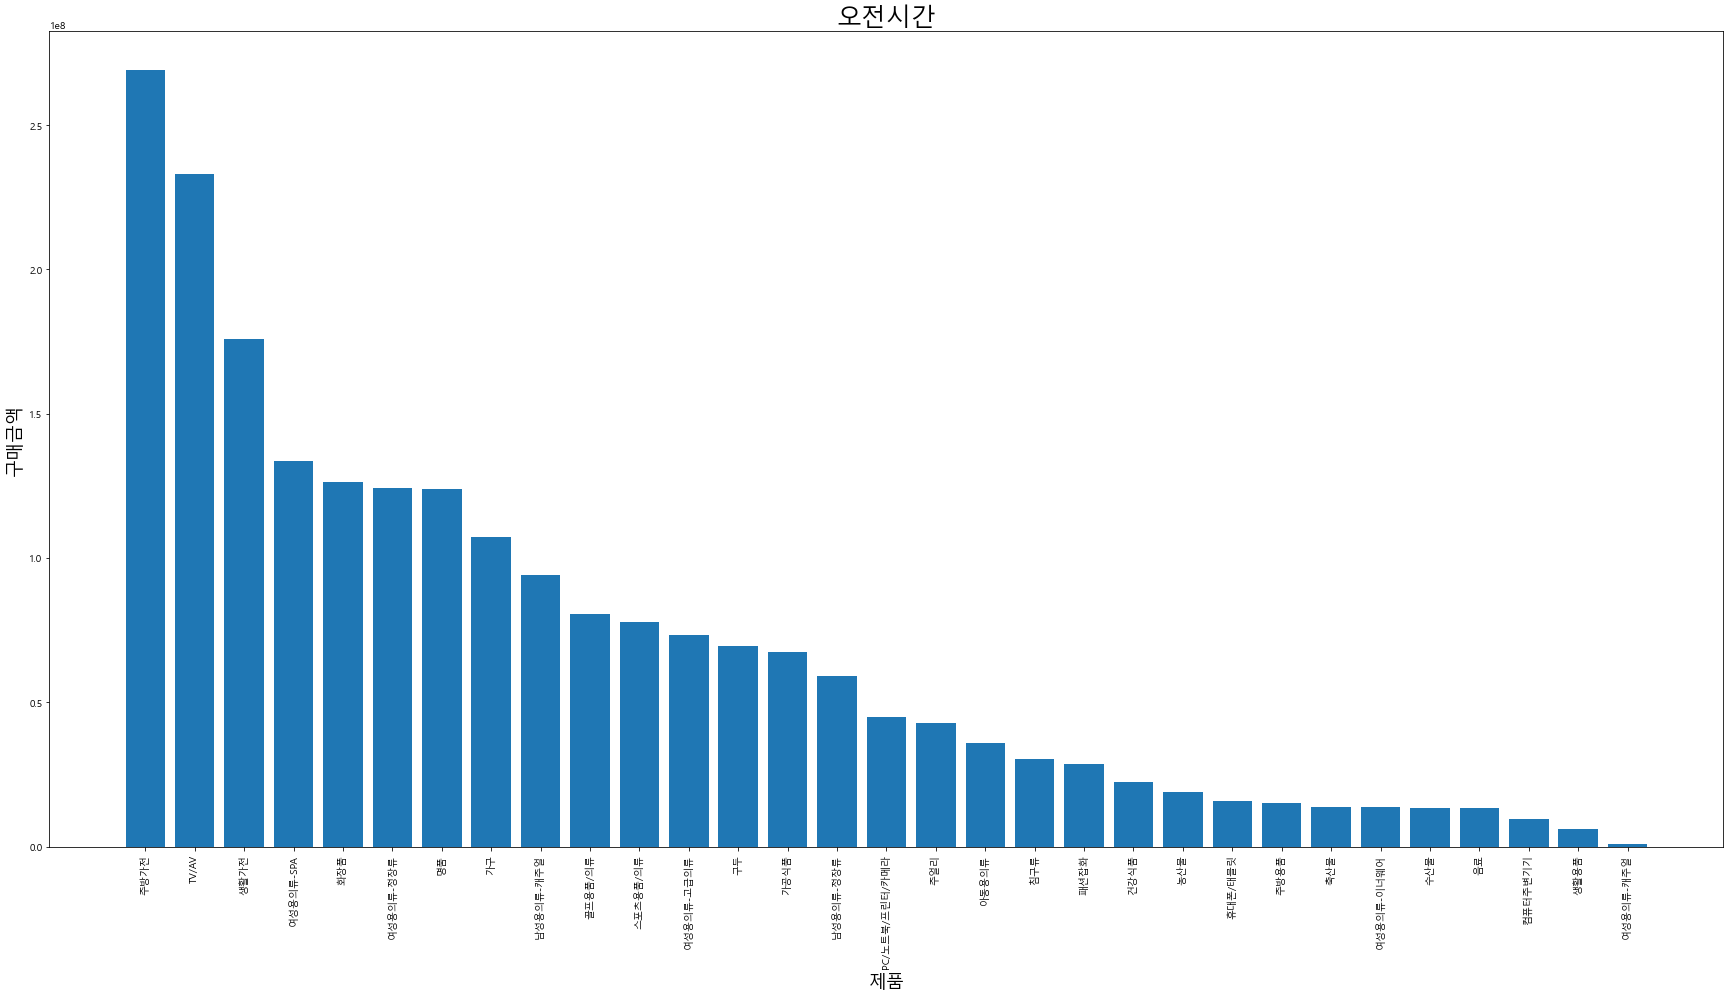

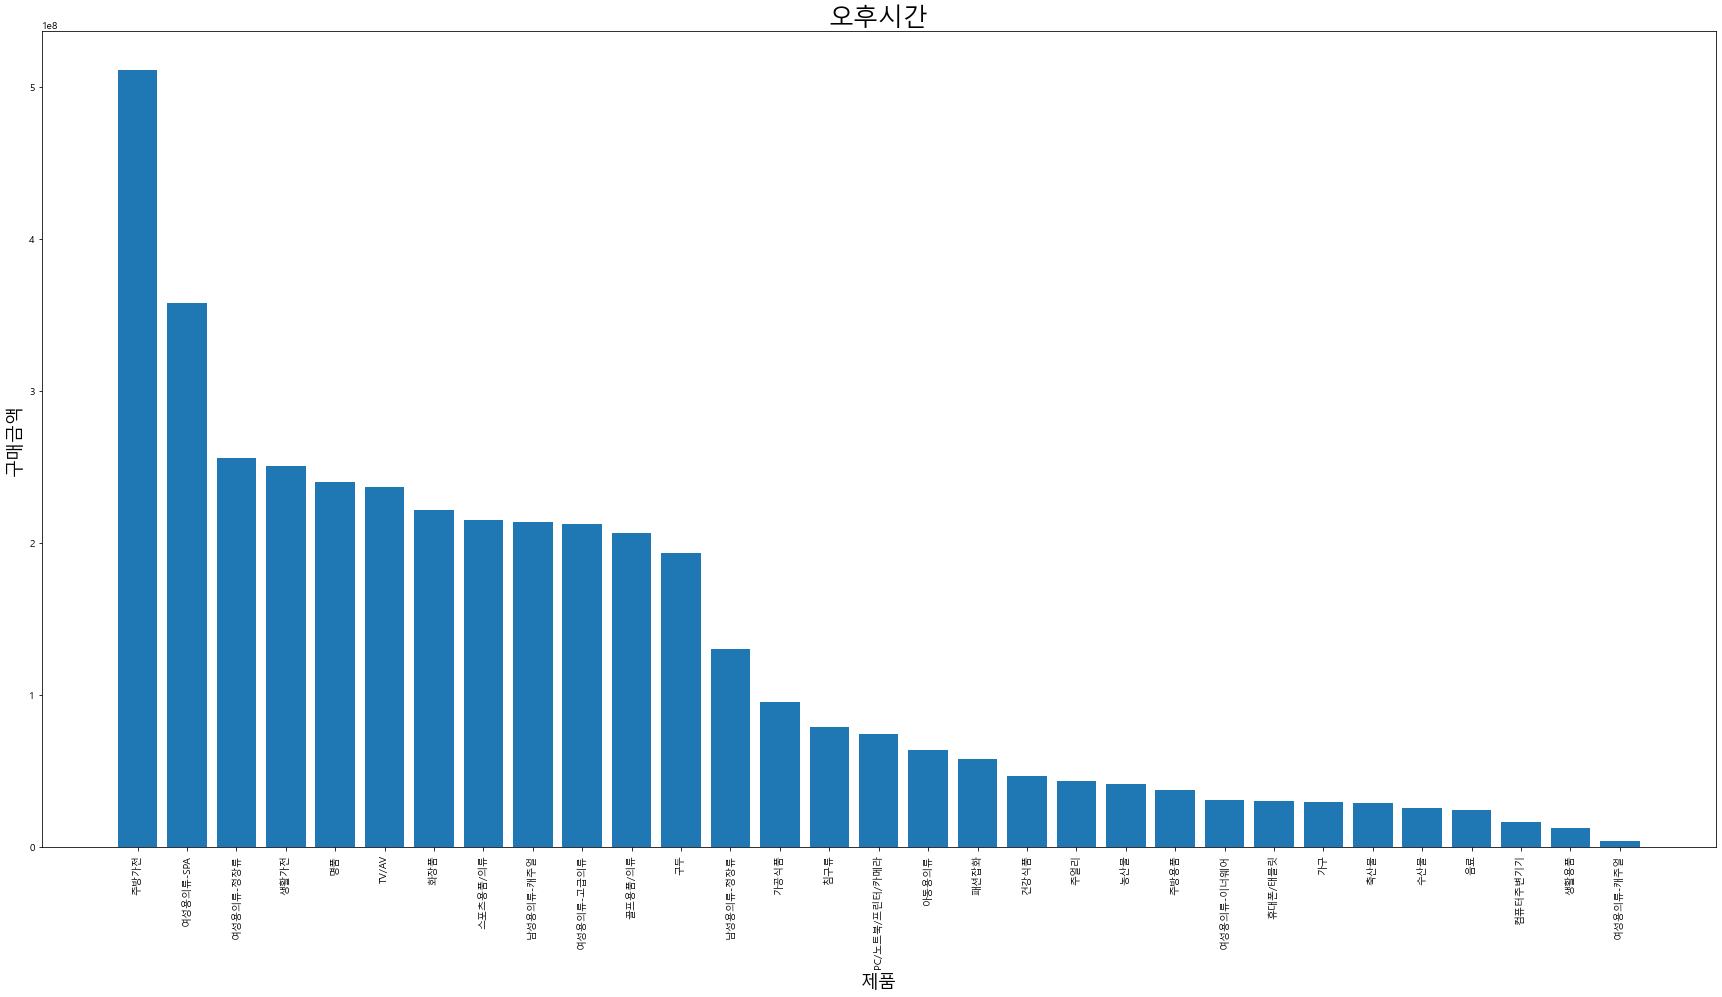

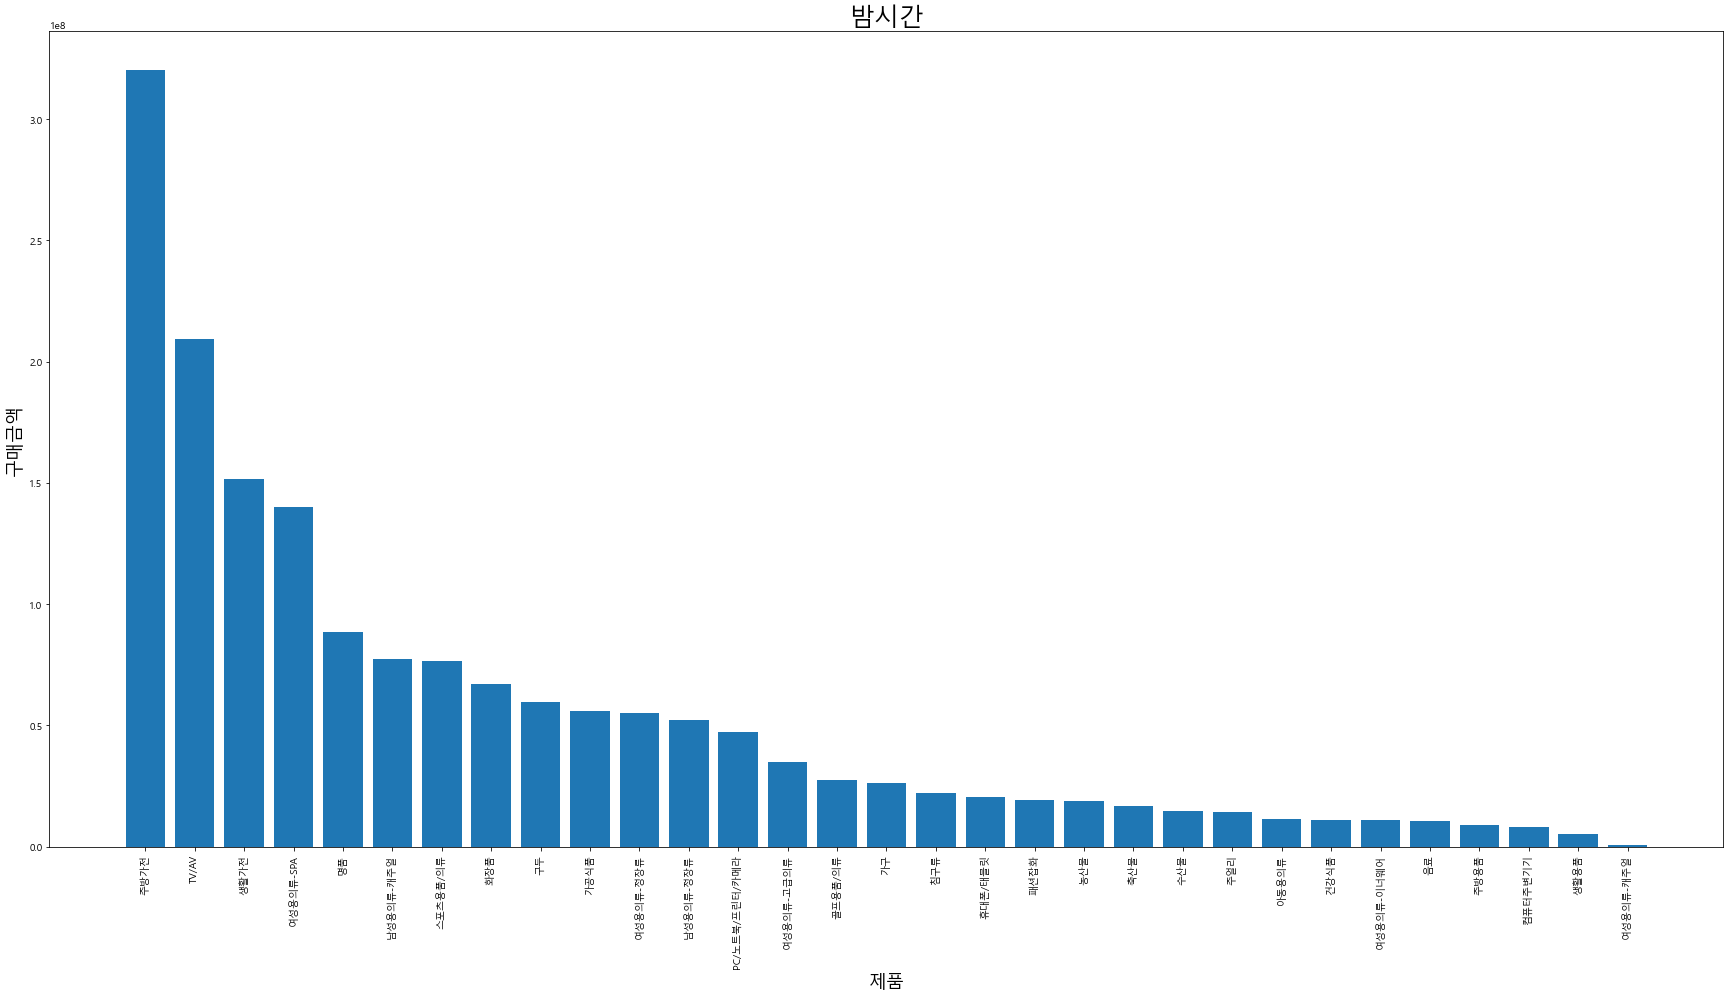

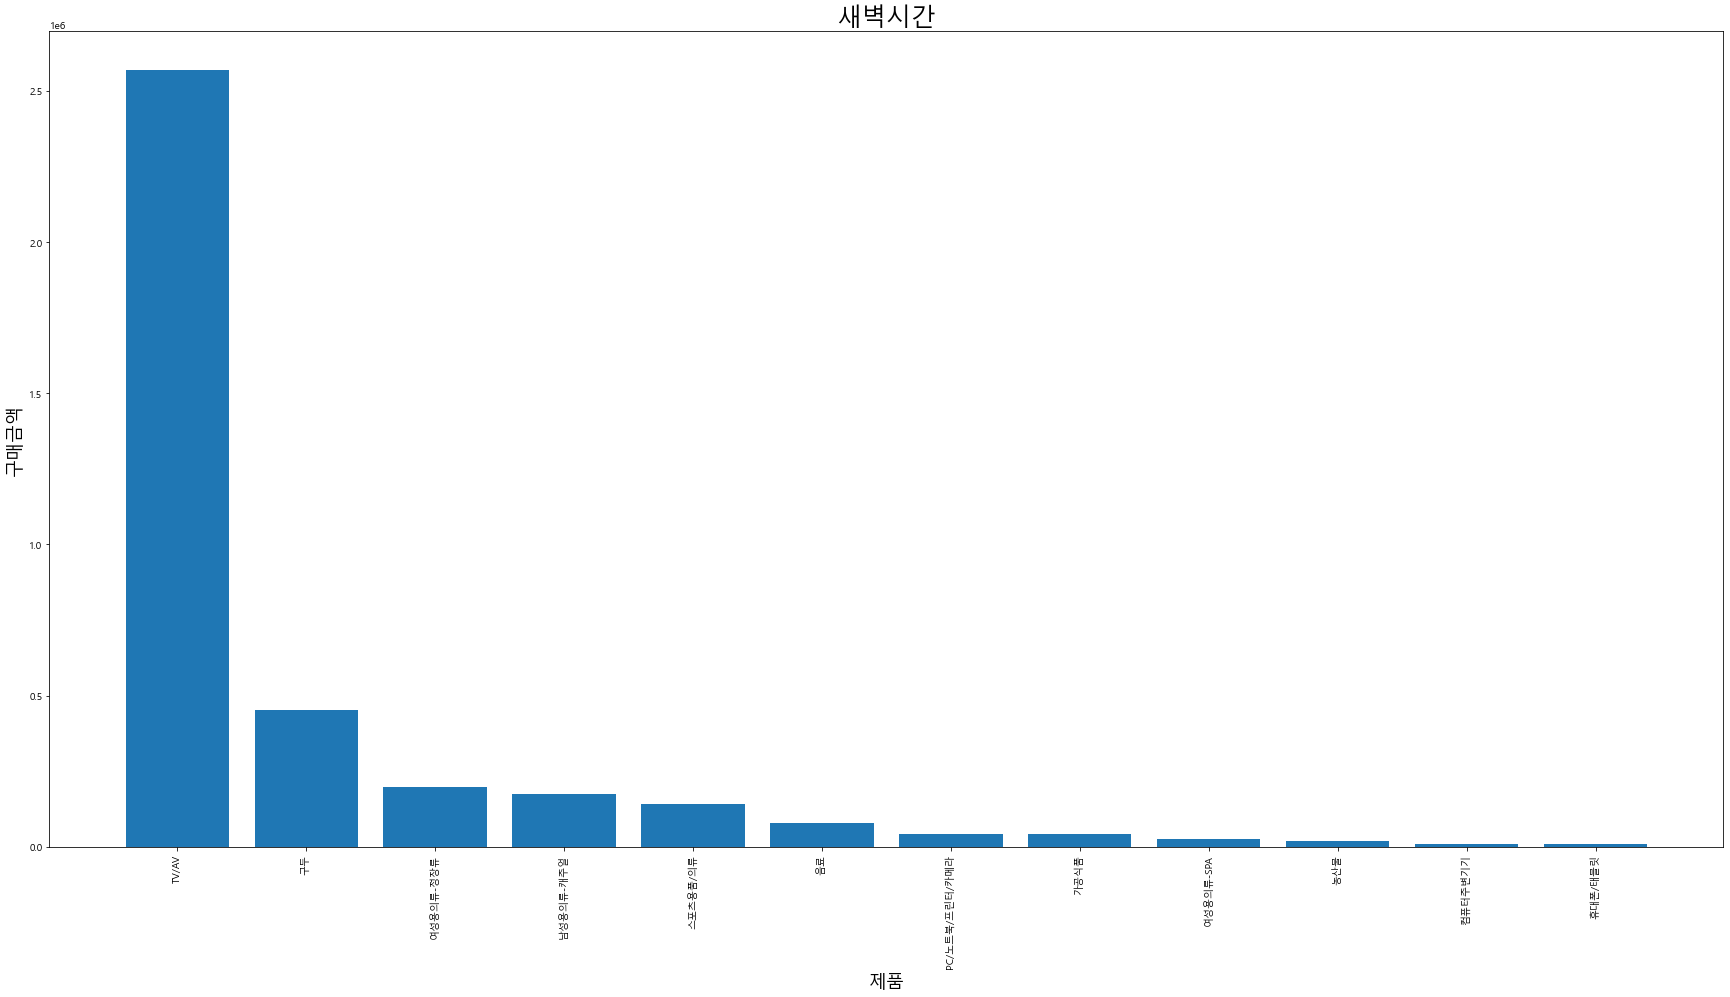

In [43]:
class_name=["오전","오후","밤","새벽"]

def bar_time_class(df,t):
    # 한글깨짐 방지
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
    # 캔버스생성
    fig = plt.figure(figsize=(30, 15)) 
    
    # 막대그리기
    plt.bar(df.index,df[('sum', '구매금액')])
    
    # 기타
    ax = fig.add_subplot() 
    ax.set_xlabel("제품",fontsize=18)
    ax.set_ylabel("구매금액",fontsize=18)
    plt.title(t,fontsize=25)
    plt.xticks(rotation=90)
    
    plt.show()
    
for c in class_name:
    temp_df=pivot_time_df.loc[c].sort_values(by=[('sum', '구매금액')],ascending=False)
    bar_time_class(temp_df,c+"시간")